In [34]:
import matplotlib.pyplot as plt
ms = 1
n_tasks = 512
subtitle = f"n_tasks = {n_tasks}, each task is {ms}ms"
x_axis_workers = [1, 2, 4, 8, 10, 12, 16, 20, 26, 30, 36, 42, 48, 54, 60, 64]
target = [(ms * n_tasks)/i for i in x_axis_workers]
print(target)

[512.0, 256.0, 128.0, 64.0, 51.2, 42.666666666666664, 32.0, 25.6, 19.692307692307693, 17.066666666666666, 14.222222222222221, 12.19047619047619, 10.666666666666666, 9.481481481481481, 8.533333333333333, 8.0]


# Processes (Pickle Protocol 0)

In [35]:
processes = [
    [100, [594.023, 327.465, 165.722, 268.447, 241.903, 203.809, 184.293, 180.421, 188.936, 408.271, 358.702, 524.578, 373.845, 432.682, 650.524, 901.751]], 
    [512, [596.482, 328.008, 166.059, 263.161, 233.017, 205.168, 248.344, 341.13, 225.316, 388.749, 463.015, 388.606, 430.948, 688.629, 527.461, 641.993]], 
    [1024, [600.409, 342.756, 168.218, 262.012, 240.622, 248.837, 171.218, 344.999, 370.24, 399.06, 370.36, 585.407, 475.506, 639.712, 798.006, 493.631]], 
    [8192, [638.531, 340.369, 192.138, 293.863, 236.156, 296.19, 331.129, 206.314, 371.699, 230.12, 515.999, 549.209, 692.733, 612.84, 514.974, 463.505]], 
    [32768, [744.463, 396.528, 238.906, 326.015, 284.802, 324.618, 414.204, 324.608, 307.748, 530.545, 413.474, 635.486, 773.788, 741.129, 983.586, 1019.85]], 
    [524288, [3164.493, 2722.592, 2602.804, 2596.881, 2621.381, 2673.671, 2748.343, 2796.654, 2702.031, 2878.81, 2970.891, 3022.855, 3215.699, 3492.516, 3362.755, 4762.434]], 
    [1048576, [5879.828, 5464.407, 5262.718, 5231.66, 5250.425, 5192.212, 5202.625, 5286.946, 5275.15, 5221.181, 5644.218, 5639.372, 6010.727, 5639.026, 6269.688, 8544.909]]
]

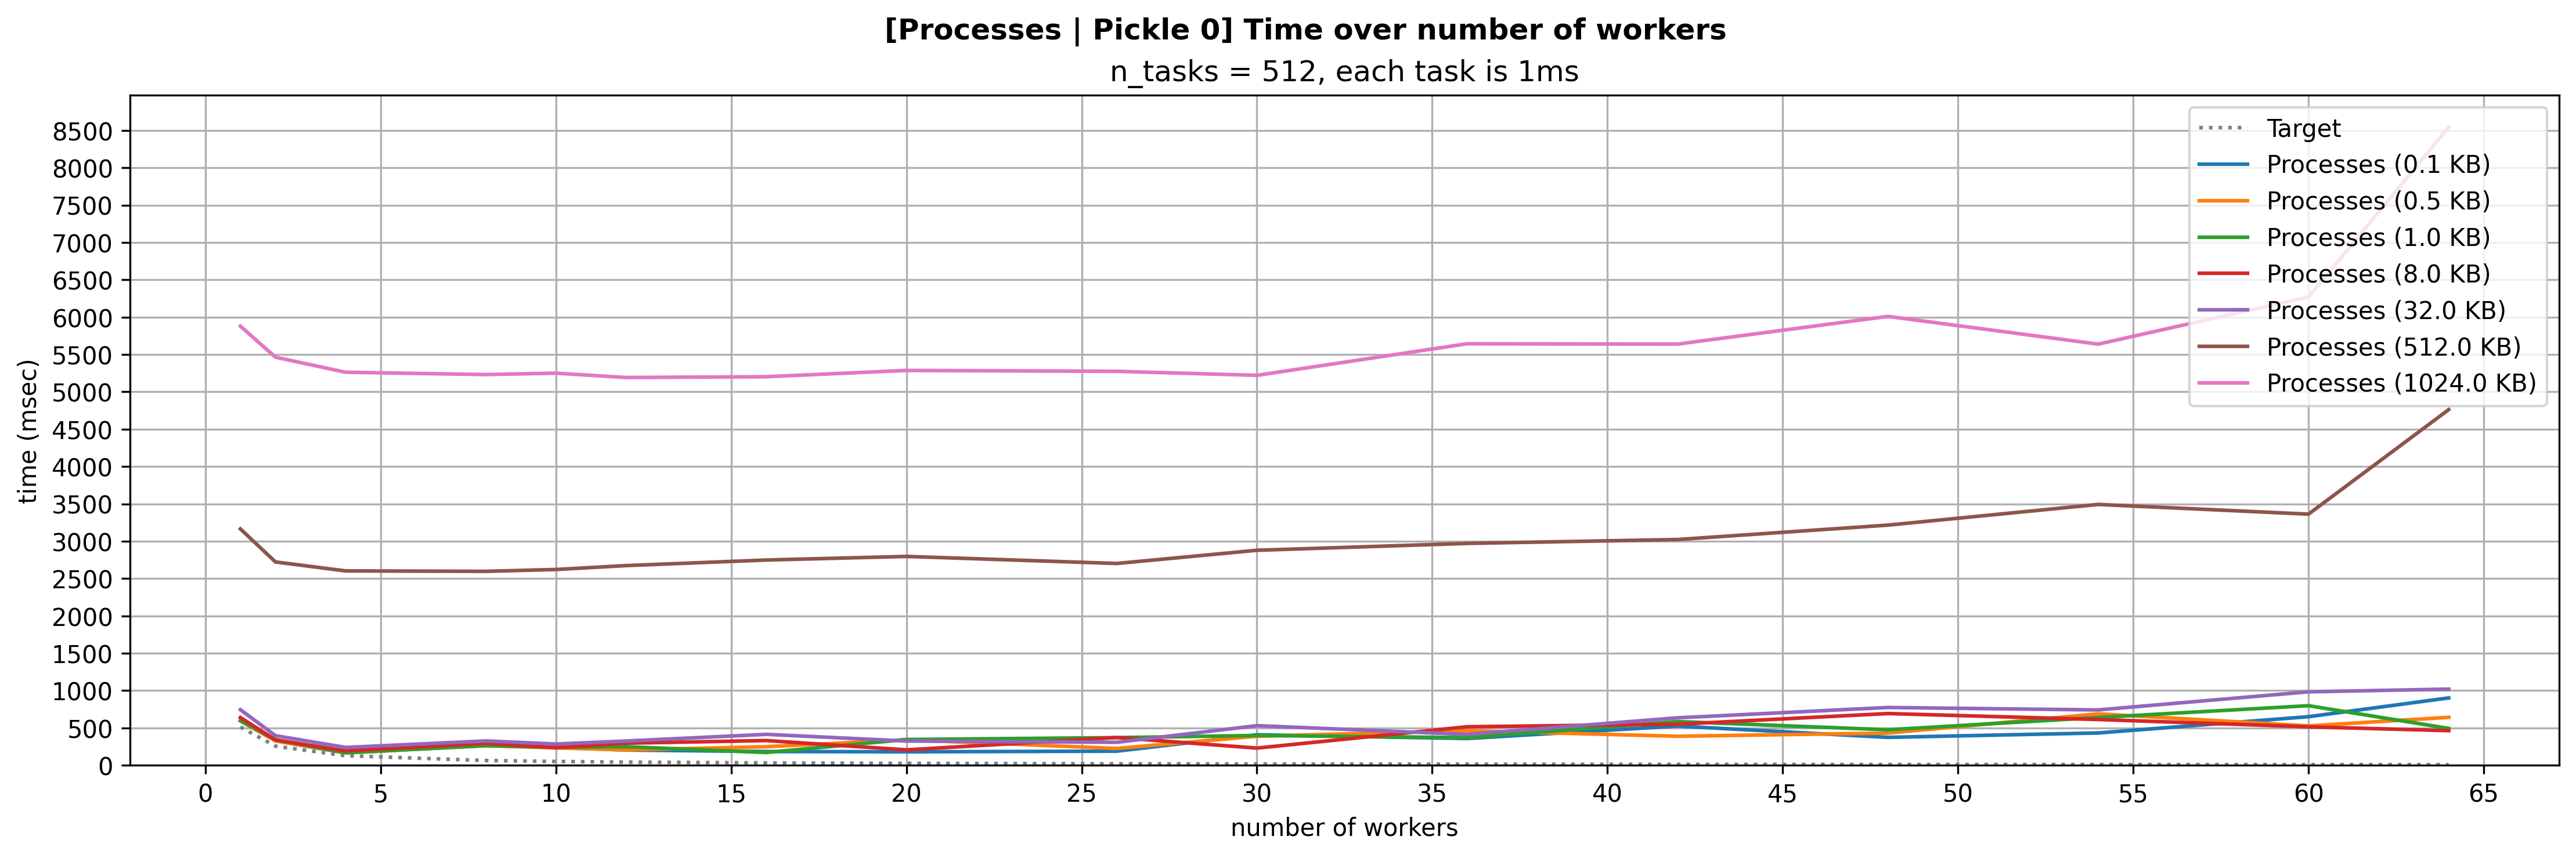

In [36]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Processes ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Processes | Pickle 0] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Subinterpreters (Pickle Protocol 0)

In [37]:
subinterpreters = [
    [100, [620.255, 354.911, 241.131, 223.878, 238.863, 244.707, 283.612, 311.448, 376.446, 418.607, 481.641, 560.081, 648.703, 751.187, 812.339, 839.345]],
    [512, [623.315, 364.359, 250.001, 214.84, 232.175, 241.236, 272.41, 329.531, 369.913, 411.638, 496.944, 555.339, 629.661, 735.325, 815.299, 844.124]],
    [1024, [621.549, 362.991, 254.678, 233.257, 236.719, 253.643, 282.128, 325.891, 368.605, 417.25, 486.544, 573.57, 645.023, 721.646, 787.506, 861.42]],
    [8192, [659.732, 380.914, 252.427, 227.3, 247.534, 261.782, 290.85, 345.874, 398.926, 419.881, 515.483, 587.923, 663.957, 719.184, 808.0, 885.166]],
    [32768, [748.375, 427.661, 274.235, 314.499, 332.84, 321.041, 405.133, 413.597, 493.613, 433.023, 519.993, 704.994, 744.716, 862.988, 804.928, 945.789]],
    [524288, [2703.13, 2178.244, 2248.99, 2284.944, 2336.847, 2329.784, 2419.44, 2462.343, 2526.309, 2568.674, 2724.604, 2764.675, 2850.709, 2914.717, 2620.699, 3730.11]],
    [1048576, [4824.765, 4296.924, 4344.776, 4437.97, 4417.877, 4442.176, 4567.409, 4541.967, 4695.43, 4683.452, 4915.45, 4873.976, 5082.544, 4796.033, 6515.959, 6903.014]],
]

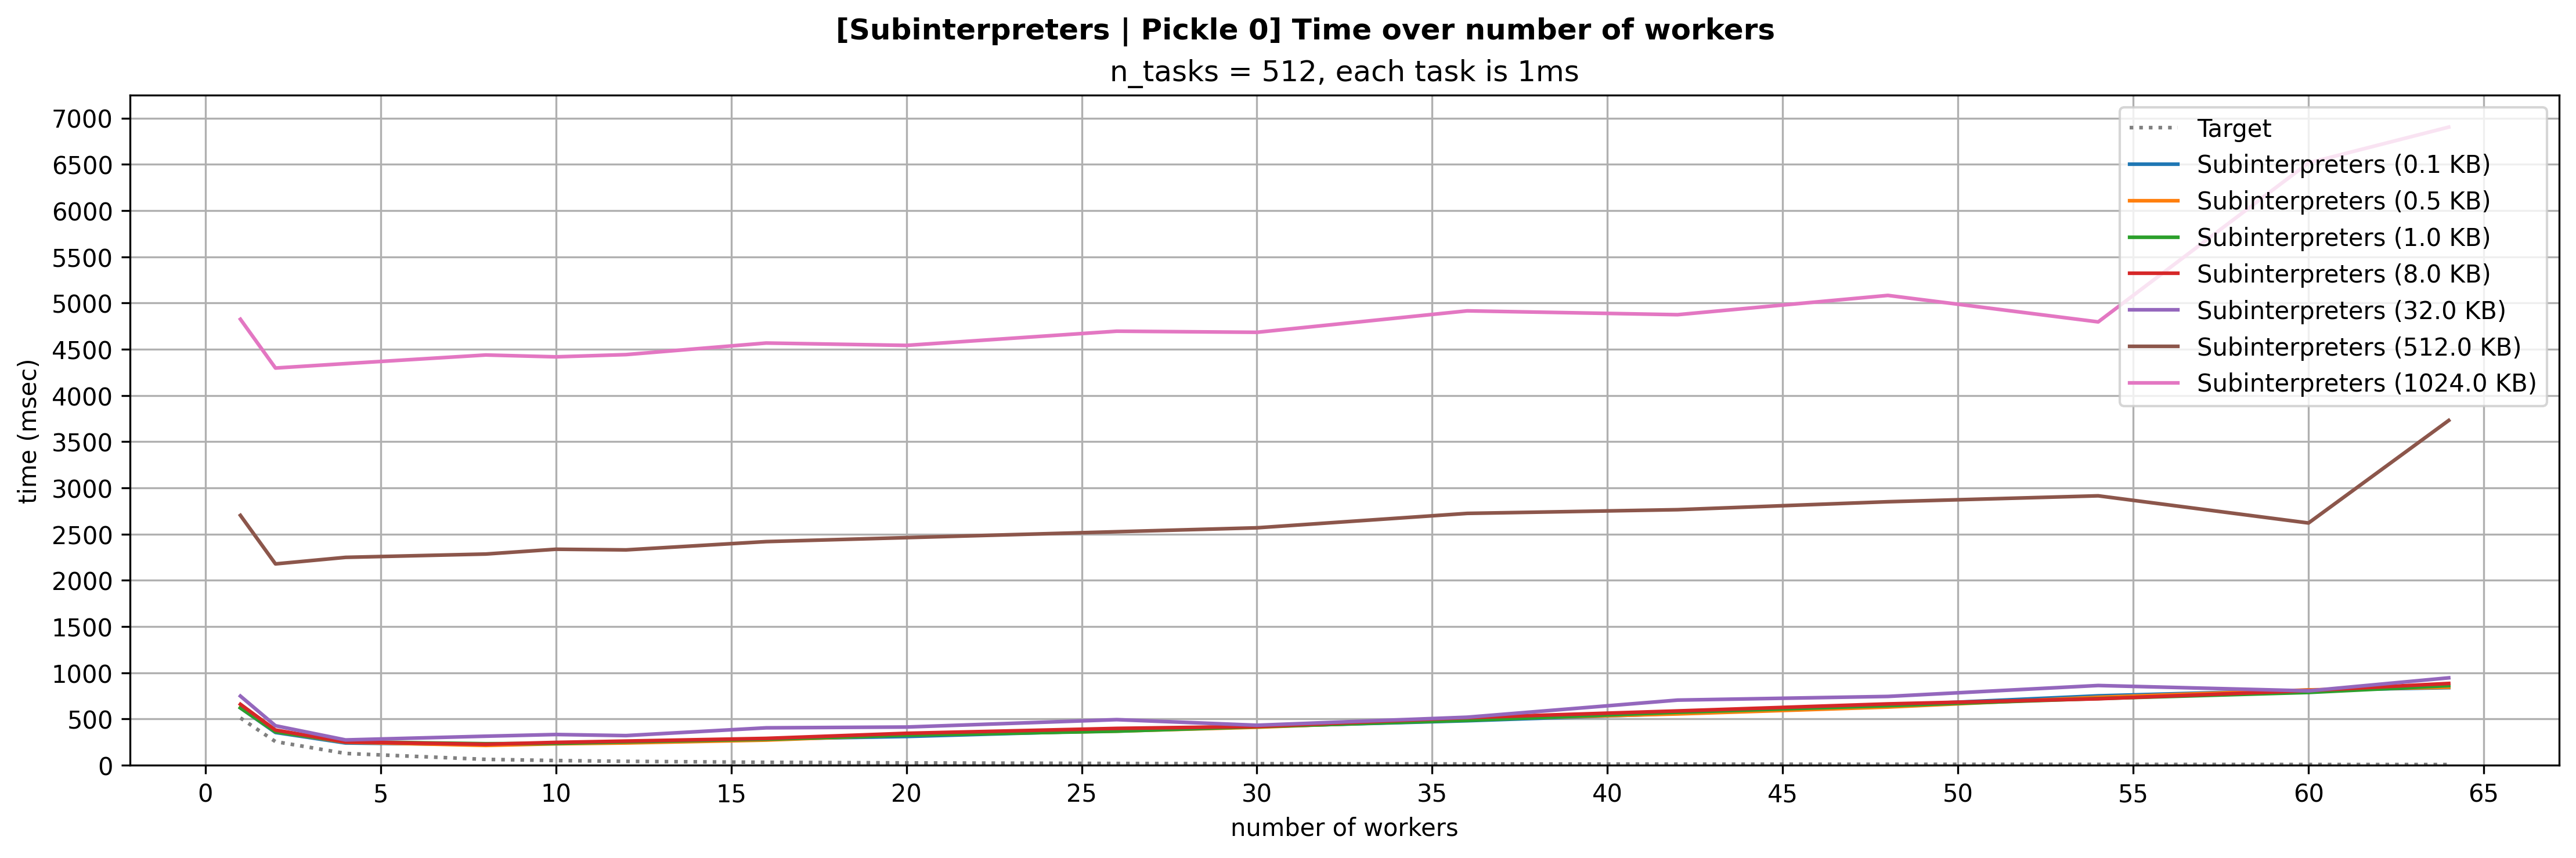

In [38]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in subinterpreters:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Subinterpreters ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Subinterpreters | Pickle 0] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Processes (Pickle Protocol 5)

In [39]:
processes_proto5 = [
    [100, [565.894, 304.144, 169.909, 97.869, 88.133, 81.464, 86.731, 128.927, 135.131, 133.78, 150.268, 179.036, 202.599, 212.093, 227.538, 237.474]],
    [512, [566.877, 294.003, 160.861, 98.751, 86.516, 82.424, 84.589, 98.889, 117.423, 130.835, 158.223, 183.161, 214.543, 231.636, 248.228, 282.136]],
    [1024, [570.003, 294.9, 170.638, 110.04, 88.235, 135.453, 88.799, 102.662, 120.745, 135.983, 159.953, 183.036, 214.136, 696.962, 266.577, 283.845]],
    [8192, [599.509, 304.7, 167.074, 102.649, 94.921, 98.702, 113.146, 123.369, 153.564, 170.051, 201.586, 247.05, 265.918, 293.702, 338.362, 377.199]],
    [32768, [629.307, 326.132, 181.138, 131.704, 156.409, 139.357, 158.319, 171.479, 204.439, 211.251, 252.277, 304.418, 316.73, 369.564, 422.756, 456.494]],
    [524288, [1803.734, 1364.4279999999999, 1274.121, 1269.578, 1269.228, 1275.196, 1375.316, 1366.596, 1405.311, 1374.997, 1455.022, 1453.058, 1506.258, 1586.8029999999999, 1634.317, 2047.15]],
    [1048576, [3279.076, 3002.015, 2698.279, 2632.111, 2632.951, 2630.3959999999997, 2640.304, 2645.947, 2700.371, 2754.066, 2692.167, 2789.2690000000002, 2777.49, 2896.129, 2948.833, 3917.745]],
]

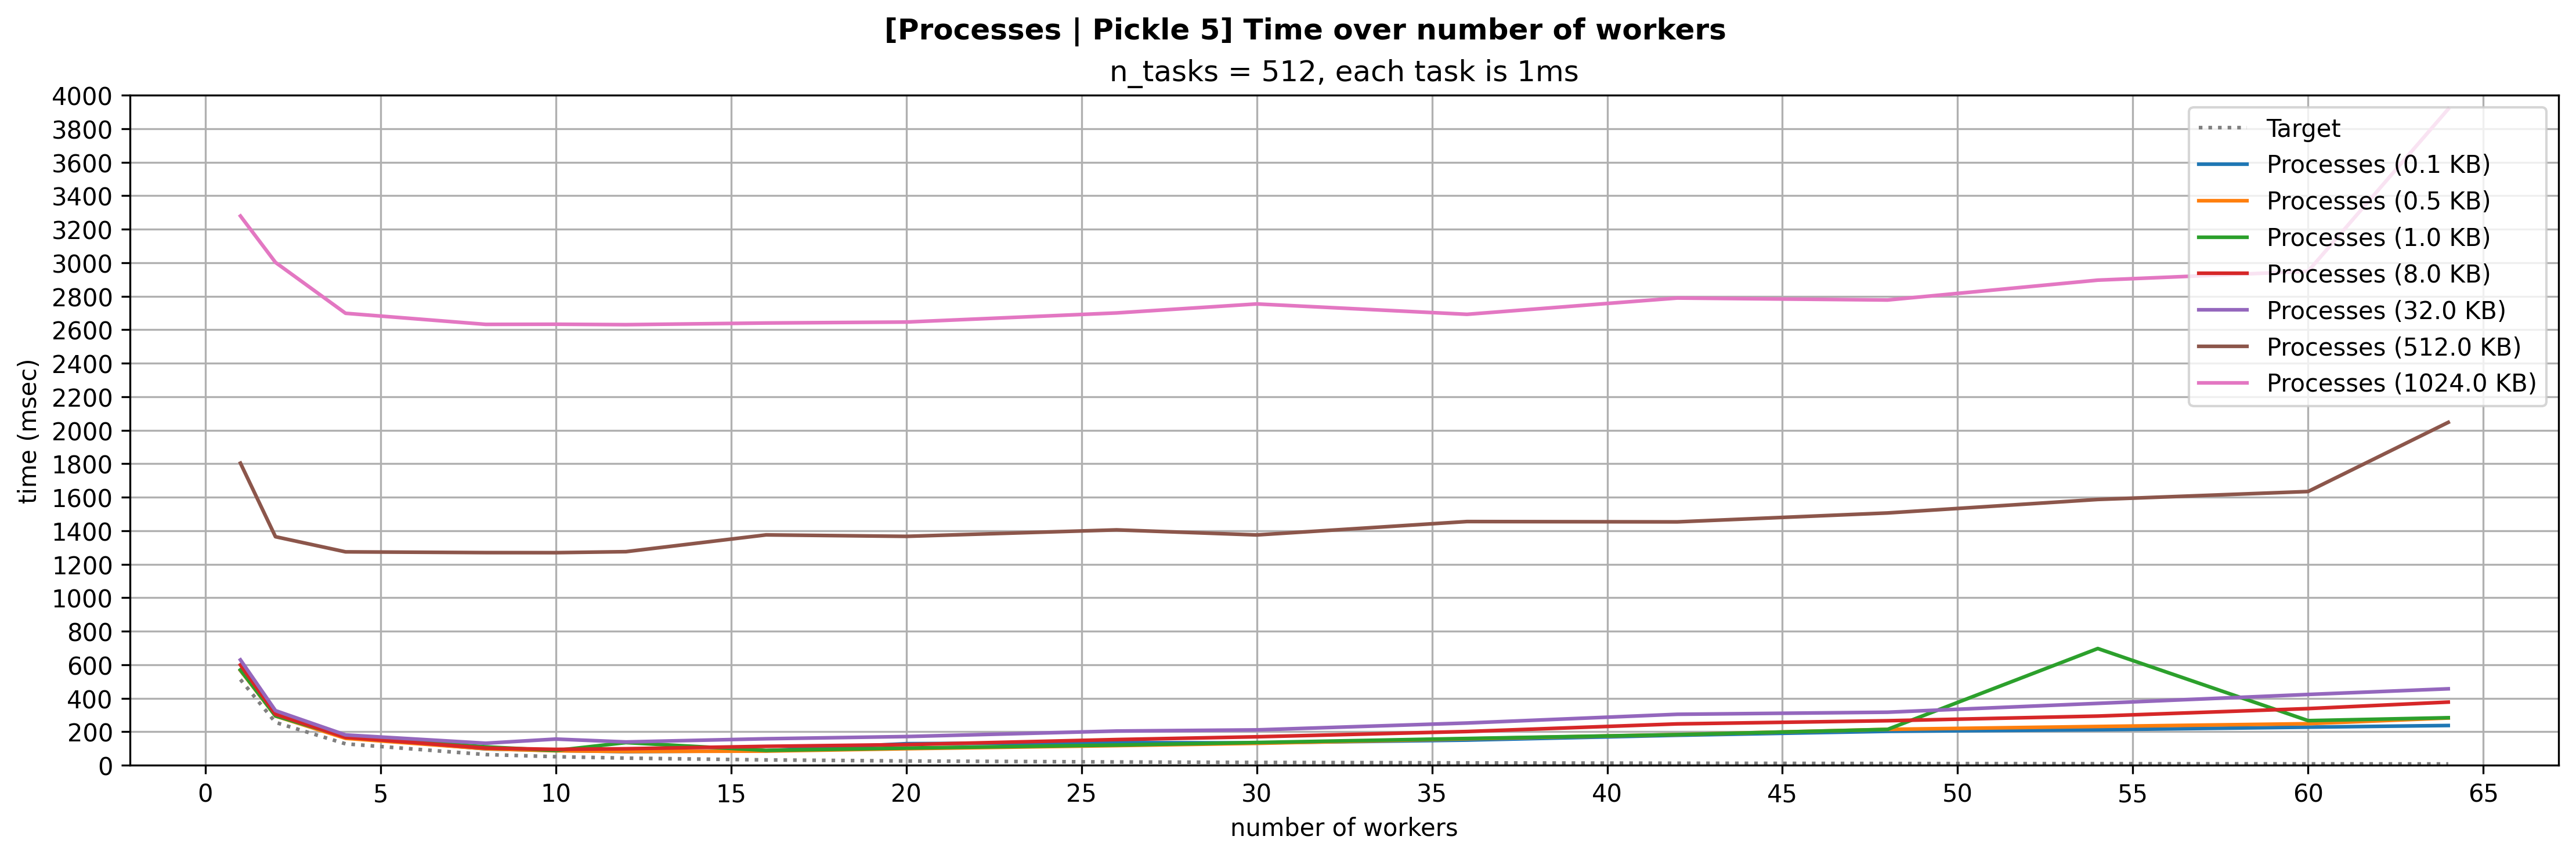

In [40]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes_proto5:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Processes ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0, ymax=4000)

plt.suptitle('[Processes | Pickle 5] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Processes (Pickle Protocol 5) No Mapping

In [41]:
processes_proto5_no_mapping = [
    [100, [548.558, 284.733, 154.008, 95.112, 85.567, 90.868, 81.166, 84.333, 94.687, 108.305, 137.621, 163.041, 204.598, 203.839, 222.853, 240.301]],
    [512, [548.975, 294.78, 164.717, 94.983, 85.857, 80.013, 80.318, 83.691, 96.744, 117.137, 151.105, 179.838, 184.719, 206.004, 237.12, 239.114]],
    [1024, [550.045, 295.696, 154.948, 95.311, 84.916, 80.849, 79.606, 83.365, 96.671, 117.036, 145.401, 169.001, 202.245, 227.574, 243.403, 260.02]],
    [8192, [567.385, 293.693, 160.138, 98.359, 88.174, 84.096, 87.267, 99.915, 119.616, 141.211, 181.135, 207.943, 245.39, 285.384, 344.095, 375.258]],
    [32768, [619.753, 317.346, 184.365, 119.544, 112.111, 127.618, 138.052, 146.151, 173.668, 208.971, 234.439, 298.213, 349.77, 403.455, 454.891, 510.447]],
    [524288, [1734.356, 1330.402, 1351.907, 1340.777, 1333.1689999999999, 1349.566, 1475.569, 1381.586, 1485.445, 1537.342, 1719.906, 1875.5439999999999, 1834.1509999999998, 1976.741, 1995.71, 1954.312]],
    [1048576, [3059.969, 2896.379, 2951.176, 2903.448, 2759.685, 2857.411, 2870.767, 2834.1459999999997, 2908.842, 3067.538, 3224.791, 3254.123, 3587.984, 3134.806, 3737.7129999999997, 3600.8450000000003]],
]

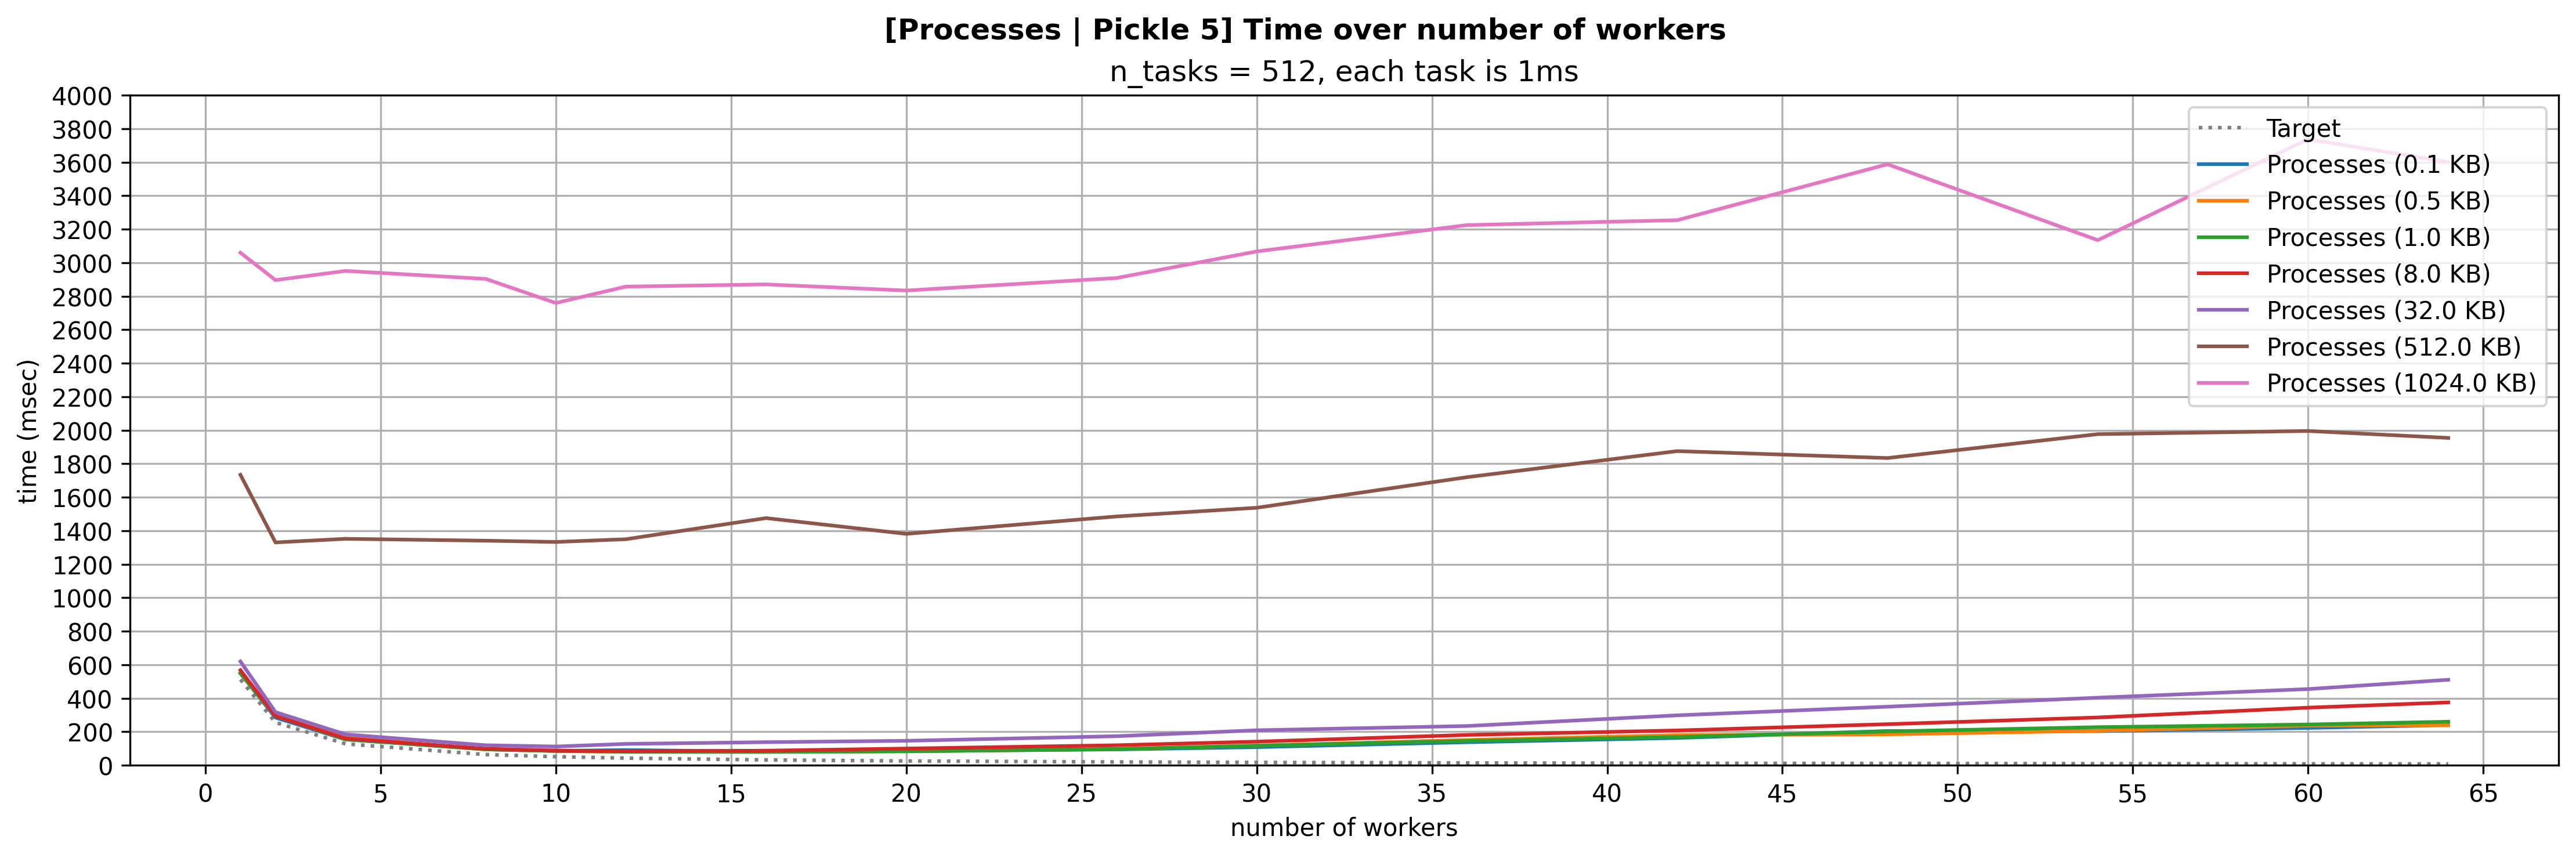

In [42]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes_proto5_no_mapping:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Processes ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0, ymax=4000)

plt.suptitle('[Processes | Pickle 5] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Processes (Pickle Protocol 5) Blocking Mode

In [43]:
processes_proto5_blocking_mode = [
    [100, [568.202, 293.992, 160.238, 119.828, 99.929, 83.446, 85.927, 94.922, 113.096, 122.025, 153.3, 177.488, 203.365, 231.033, 255.291, 268.442]],
    [512, [569.078, 294.437, 183.0, 97.902, 109.852, 85.886, 174.578, 95.863, 114.337, 132.91, 154.764, 188.267, 203.006, 235.704, 269.196, 271.624]],
    [1024, [571.044, 295.388, 171.534, 99.711, 87.649, 82.374, 89.053, 100.544, 138.908, 142.297, 161.788, 175.931, 210.951, 233.915, 272.904, 288.747]],
    [8192, [588.837, 305.028, 166.925, 103.702, 92.756, 97.453, 107.574, 122.503, 218.12, 151.062, 181.561, 205.991, 240.041, 278.079, 309.15, 326.981]],
    [32768, [642.57, 326.007, 178.788, 132.36, 144.34, 159.884, 155.521, 189.561, 188.552, 198.232, 227.213, 256.755, 288.626, 323.448, 375.482, 394.449]],
    [524288, [1805.442, 1358.377, 1277.095, 1295.761, 1270.316, 1273.463, 1305.32, 1306.466, 1373.3899999999999, 1368.213, 1409.512, 1432.945, 1463.038, 1496.938, 1542.778, 1668.496]],
    [1048576, [3265.992, 2950.008, 2698.141, 2614.661, 2617.608, 2618.129, 2626.698, 2639.997, 2764.926, 2684.779, 2703.225, 2686.931, 2705.654, 2803.016, 2894.517, 3067.929]],
]

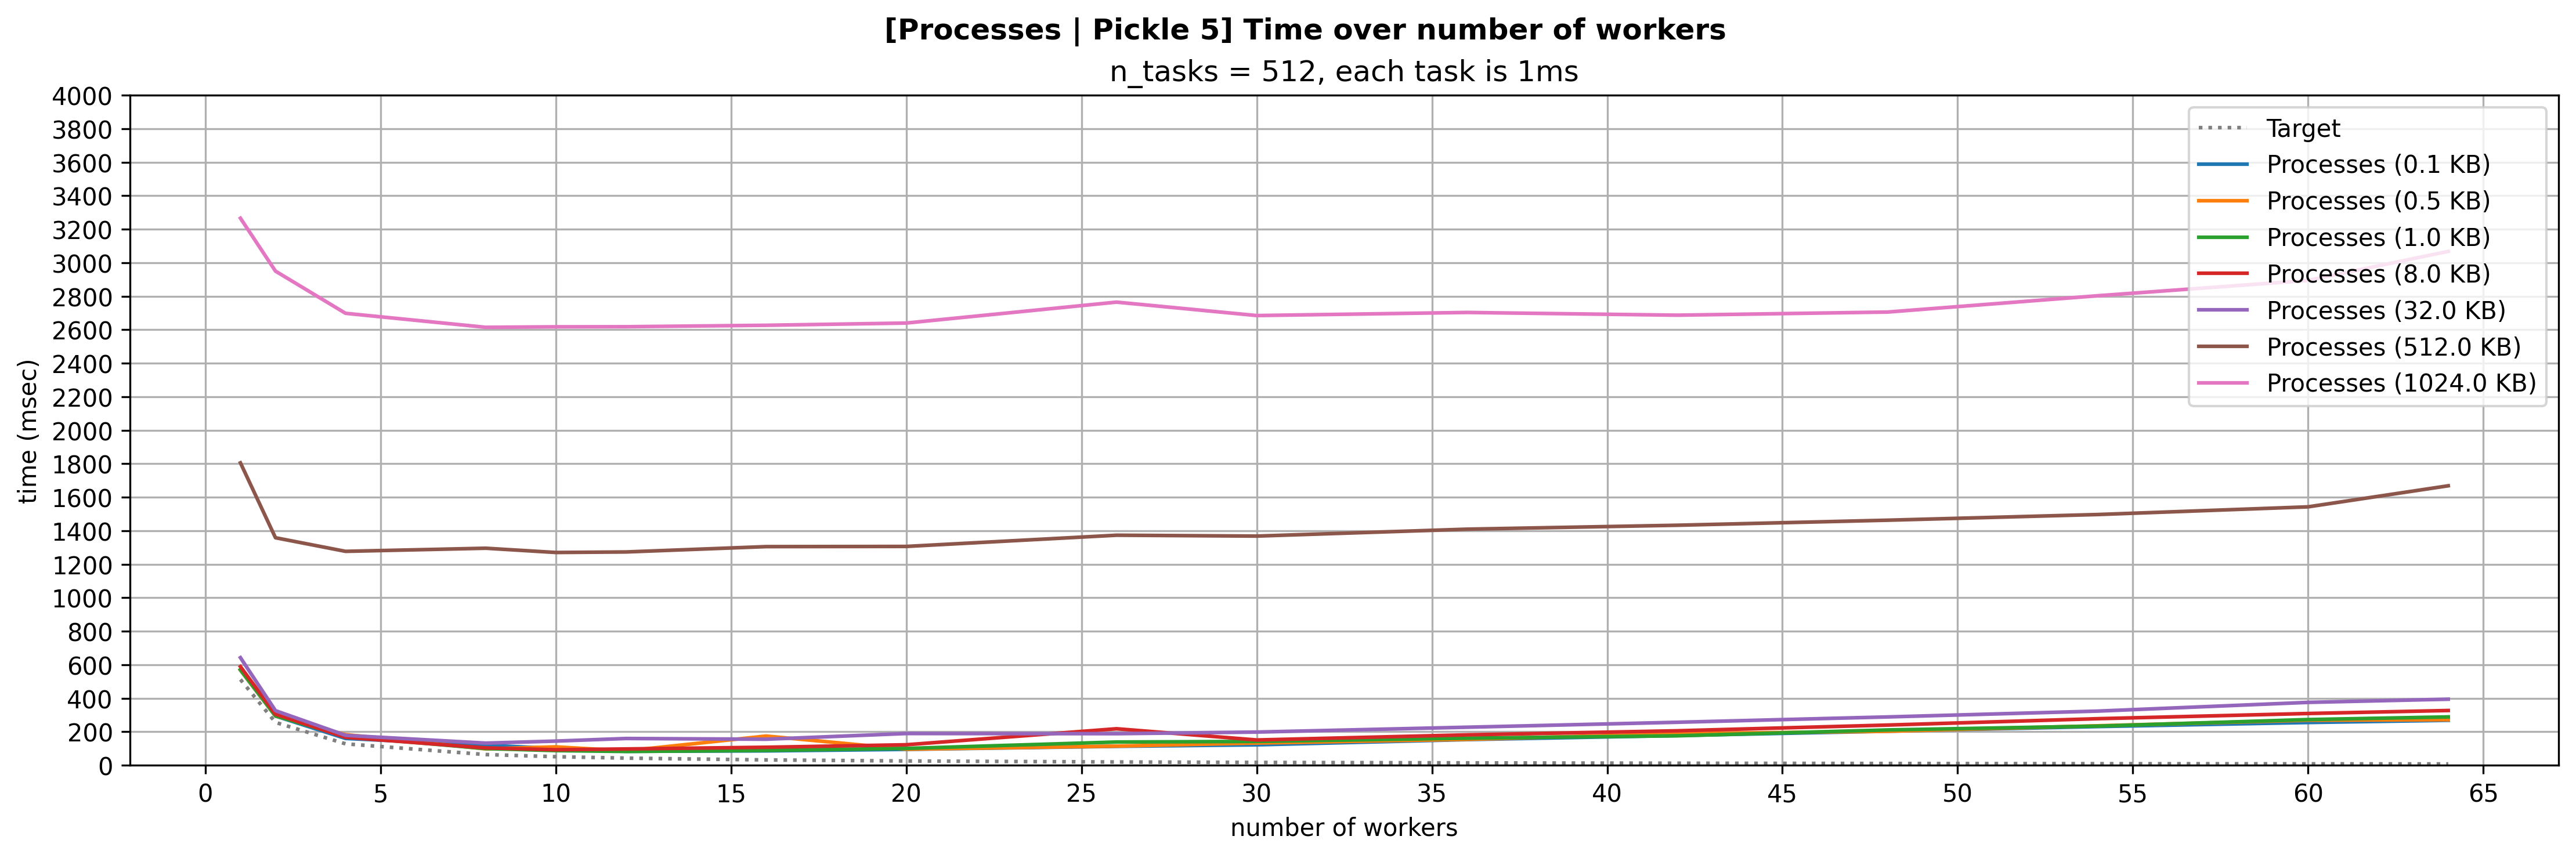

In [44]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in processes_proto5_blocking_mode:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Processes ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0, ymax=4000)

plt.suptitle('[Processes | Pickle 5] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Subinterpreters (Pickle Protocol 5)

In [45]:
subinterpreters_proto5 = [
    [100, [589.581, 351.666, 233.4, 205.639, 226.876, 234.331, 262.186, 278.346, 352.495, 377.742, 431.564, 498.554, 559.465, 633.848, 676.063, 711.493]],
    [512, [590.678, 348.569, 235.063, 218.398, 220.724, 231.339, 258.227, 286.091, 343.722, 374.296, 458.996, 494.906, 570.288, 617.971, 671.402, 707.668]],
    [1024, [593.492, 353.056, 235.443, 213.549, 224.956, 235.652, 253.812, 284.345, 343.112, 392.241, 447.884, 506.902, 546.063, 619.86, 678.735, 711.878]],
    [8192, [604.052, 349.436, 250.656, 213.723, 220.787, 239.271, 264.405, 300.126, 356.583, 404.833, 444.841, 509.952, 568.956, 632.682, 698.124, 715.737]],
    [32768, [633.002, 370.46, 245.912, 233.562, 241.81, 249.445, 272.861, 306.138, 373.009, 441.059, 466.96, 561.12, 587.702, 650.199, 696.86, 722.156]],
    [524288, [1069.404, 625.051, 713.186, 791.261, 783.335, 816.465, 898.61, 930.677, 979.491, 845.34, 1112.171, 1106.881, 1187.29, 1257.106, 1311.971, 1365.535]],
    [1048576, [1568.943, 1069.115, 1216.146, 1307.466, 1302.601, 1345.681, 1414.392, 1465.752, 1542.371, 1584.387, 1684.298, 1750.845, 1765.2150000000001, 1822.205, 1893.882, 2085.596]],
]

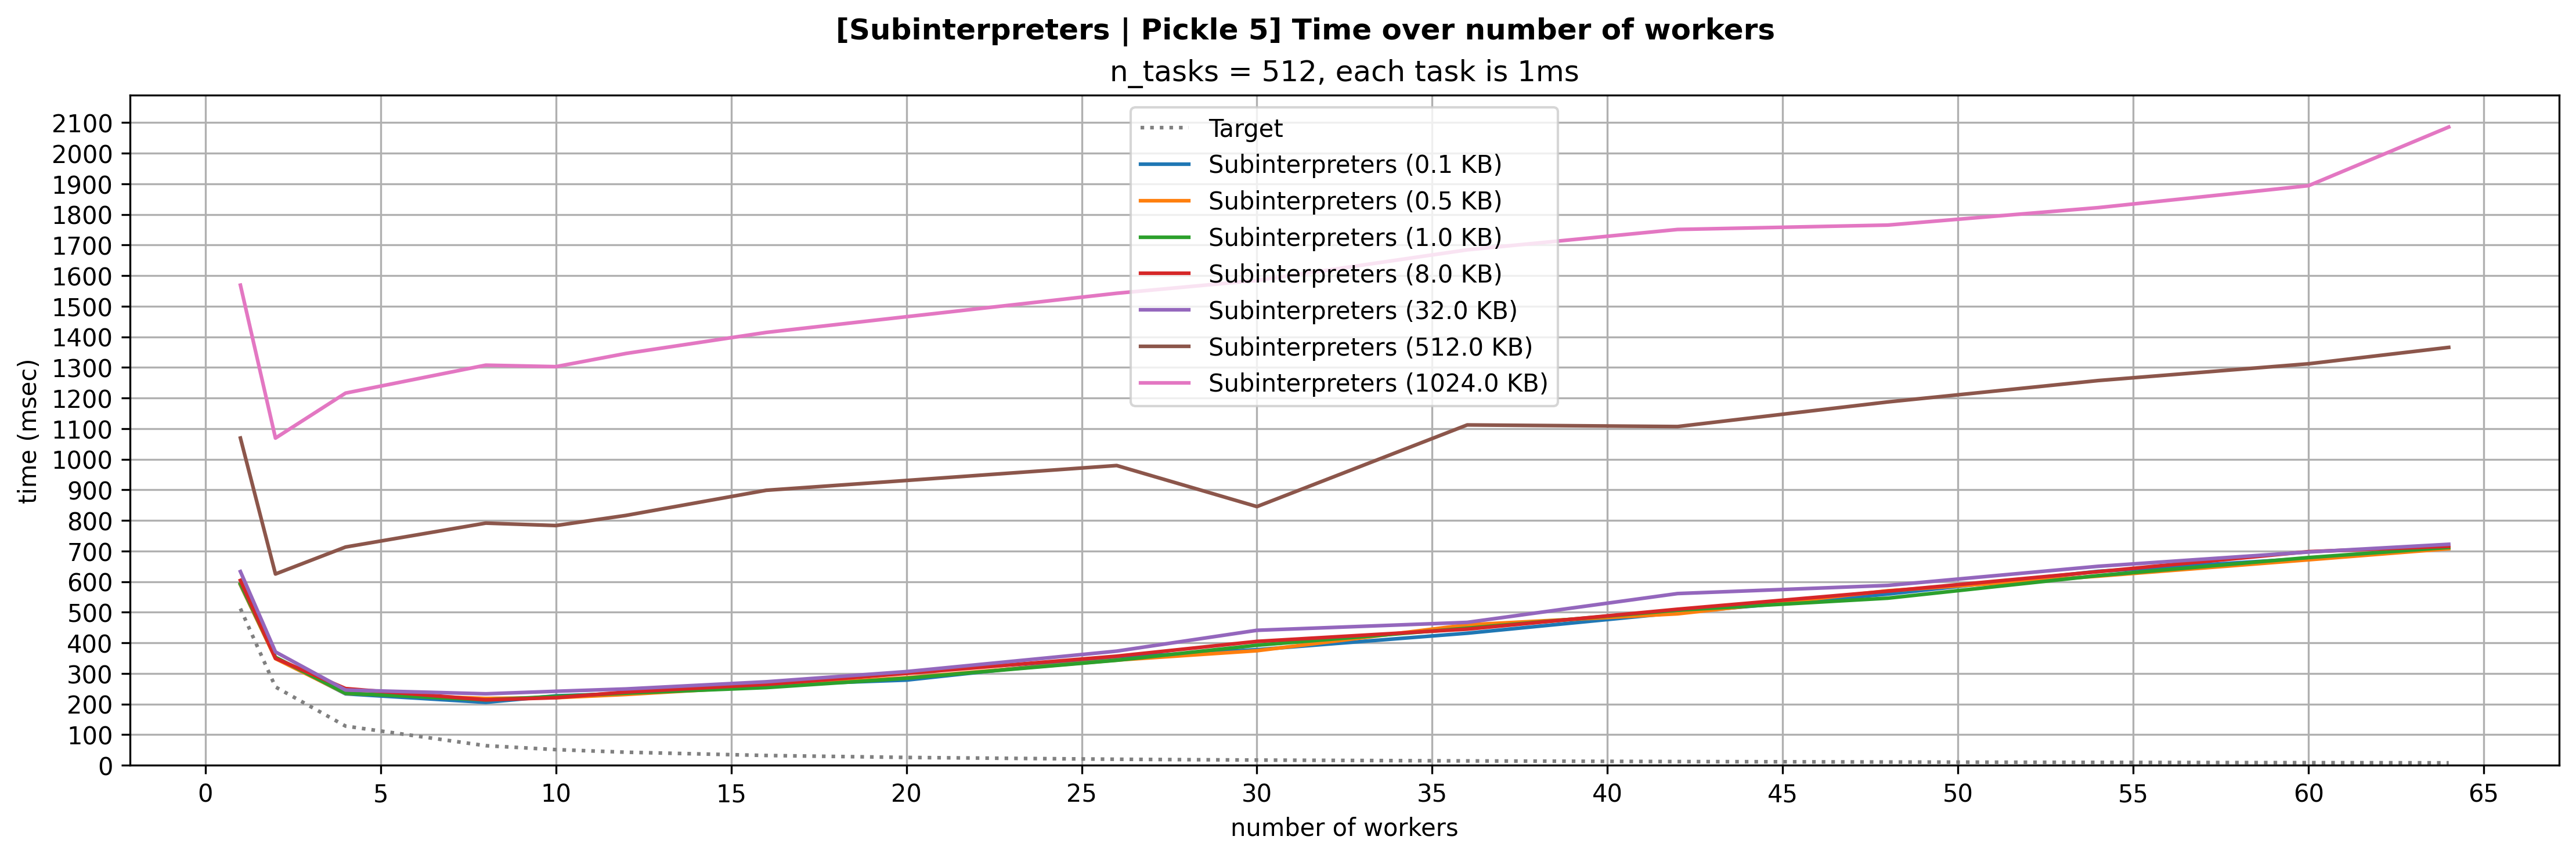

In [46]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in subinterpreters_proto5:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Subinterpreters ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Subinterpreters | Pickle 5] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Subinterpreters (Pickle Protocol 5) No Mapping

In [47]:
subinterpreters_proto5_no_mapping = [
    [100, [588.388, 340.293, 241.556, 225.478, 227.234, 237.051, 279.471, 327.686, 363.726, 444.413, 472.608, 526.963, 558.373, 633.519, 691.179, 733.943]],
    [512, [588.29, 350.713, 236.678, 202.922, 220.214, 234.066, 280.781, 329.379, 369.47, 410.829, 468.179, 517.115, 593.469, 682.14, 707.242, 747.702]],
    [1024, [589.064, 340.062, 232.811, 205.261, 232.448, 249.314, 282.775, 313.647, 401.826, 398.638, 501.718, 528.199, 575.988, 638.348, 719.118, 724.785]],
    [8192, [609.743, 358.202, 245.483, 227.413, 219.508, 242.858, 281.277, 337.148, 373.938, 423.648, 455.329, 544.603, 594.911, 656.922, 755.819, 759.695]],
    [32768, [633.502, 370.376, 254.383, 233.993, 238.981, 265.905, 315.44, 343.862, 376.007, 426.35, 492.688, 554.468, 594.145, 662.052, 712.144, 775.304]],
    [524288, [1083.892, 660.946, 686.473, 749.312, 837.619, 823.068, 893.108, 924.863, 997.754, 1115.937, 1191.606, 1249.193, 1281.159, 1266.939, 1468.834, 1332.234]],
    [1048576, [1560.621, 1124.991, 1148.581, 1273.819, 1348.31, 1360.228, 1517.701, 1466.978, 1654.9299999999998, 1682.7, 1799.826, 1952.286, 1876.467, 1993.6190000000001, 2097.274, 2163.223]],    
]

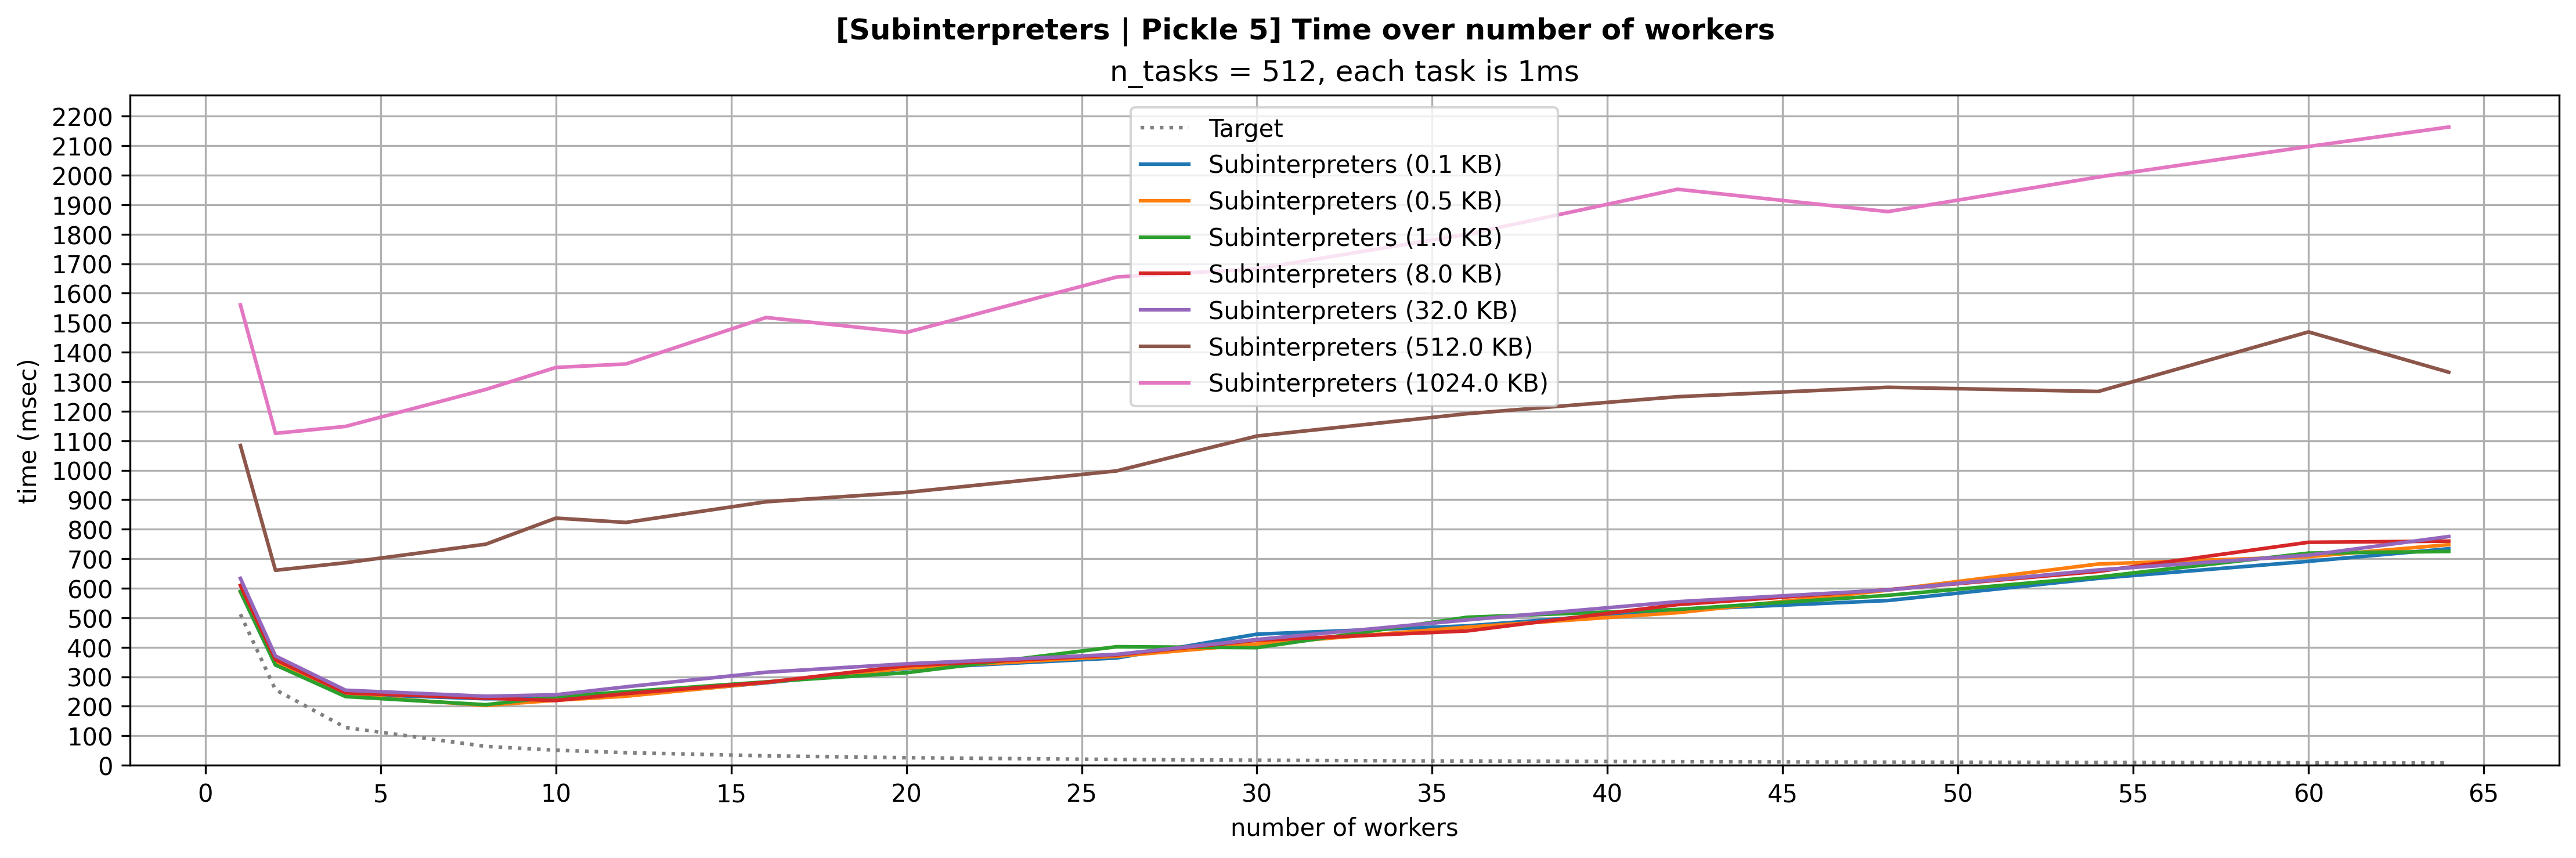

In [48]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
axs.grid()
# Setting the number of ticks
plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
plt.locator_params(axis='y', nbins=24)
plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")
for res in subinterpreters_proto5_no_mapping:
    kb = 0.1 if res[0] == 100 else res[0] / 1024
    plt.plot(x_axis_workers, res[1], label=f"Subinterpreters ({kb} KB)")

axs.set_xlabel("number of workers")
axs.set_ylabel("time (msec)")
axs.set_ylim(ymin=0)

plt.suptitle('[Subinterpreters | Pickle 5] Time over number of workers', y=0.97, fontweight="bold")
plt.title(subtitle)
plt.legend()
#savefig("stream_service_time")
plt.show()

# Comparison

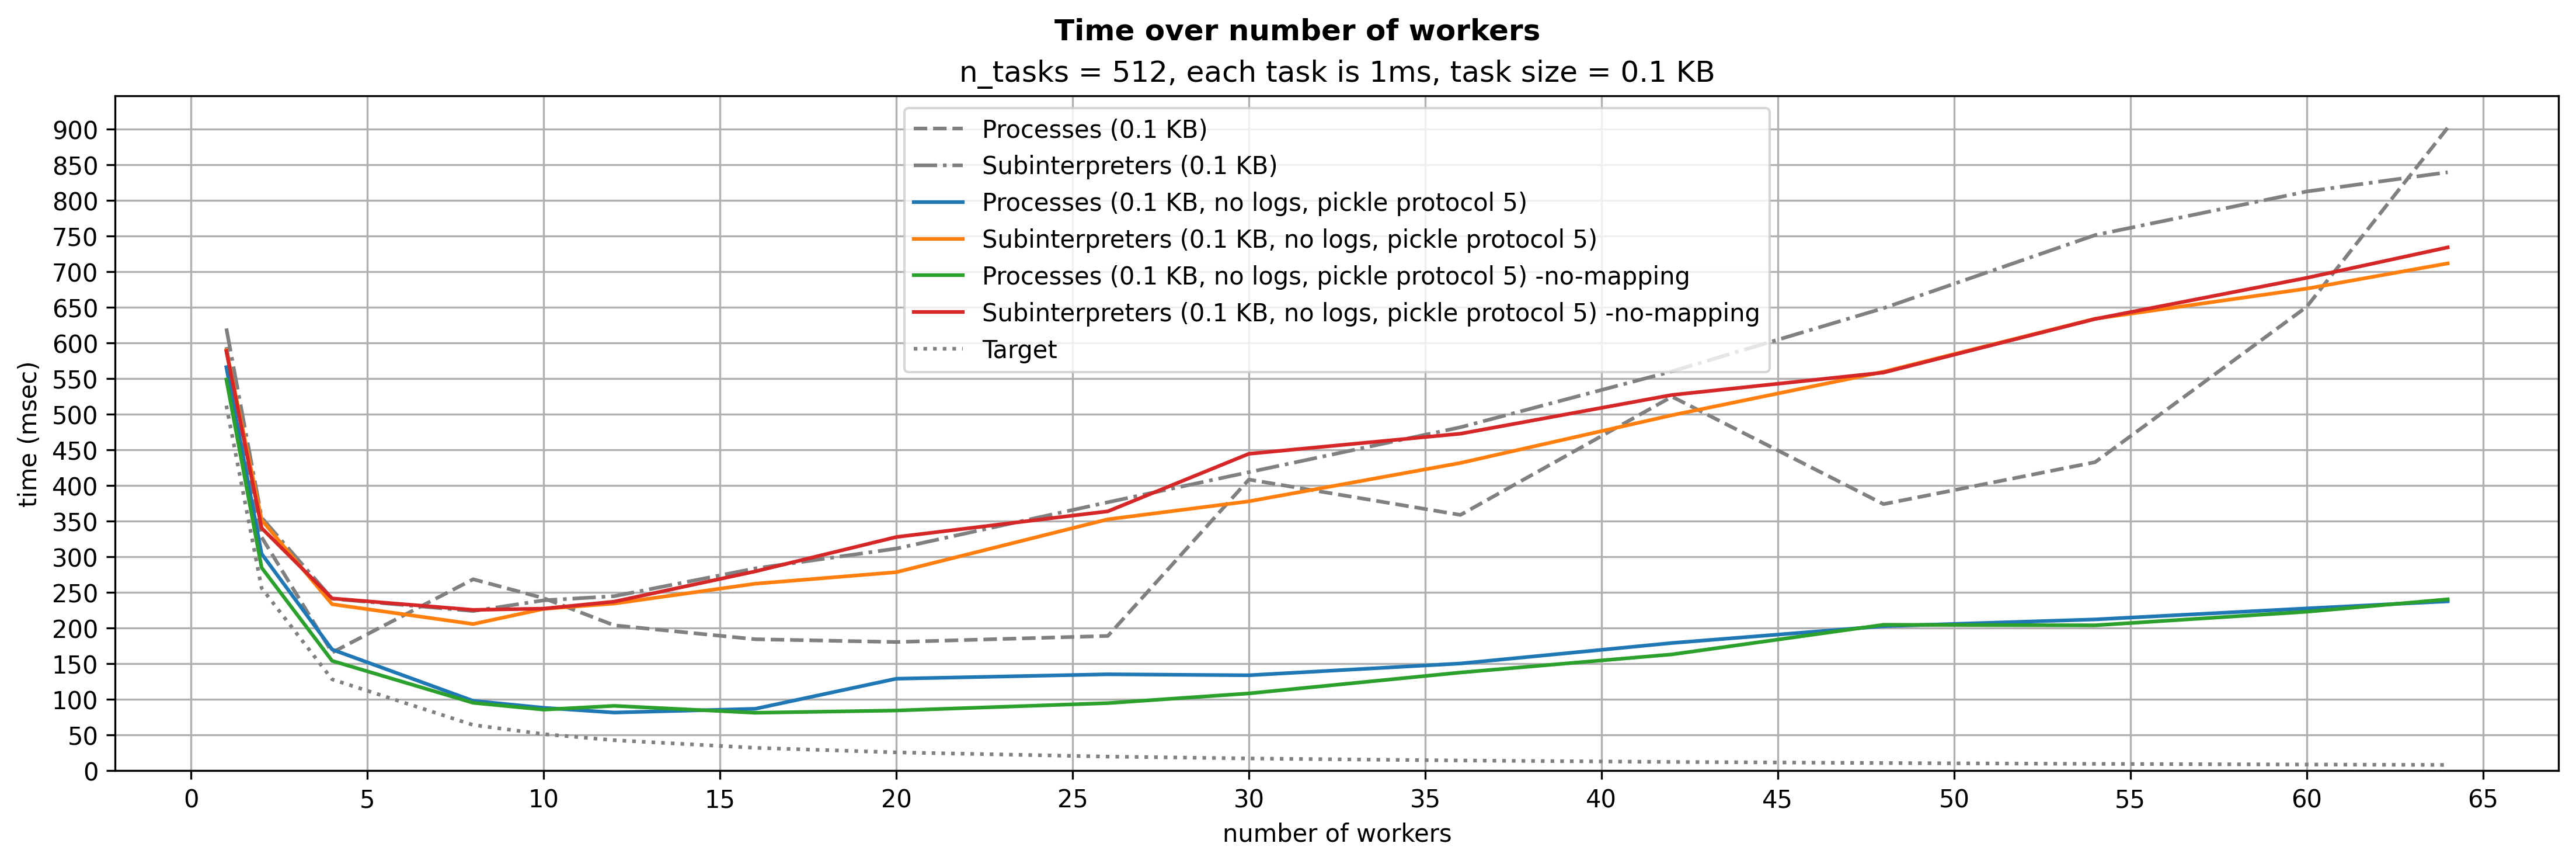

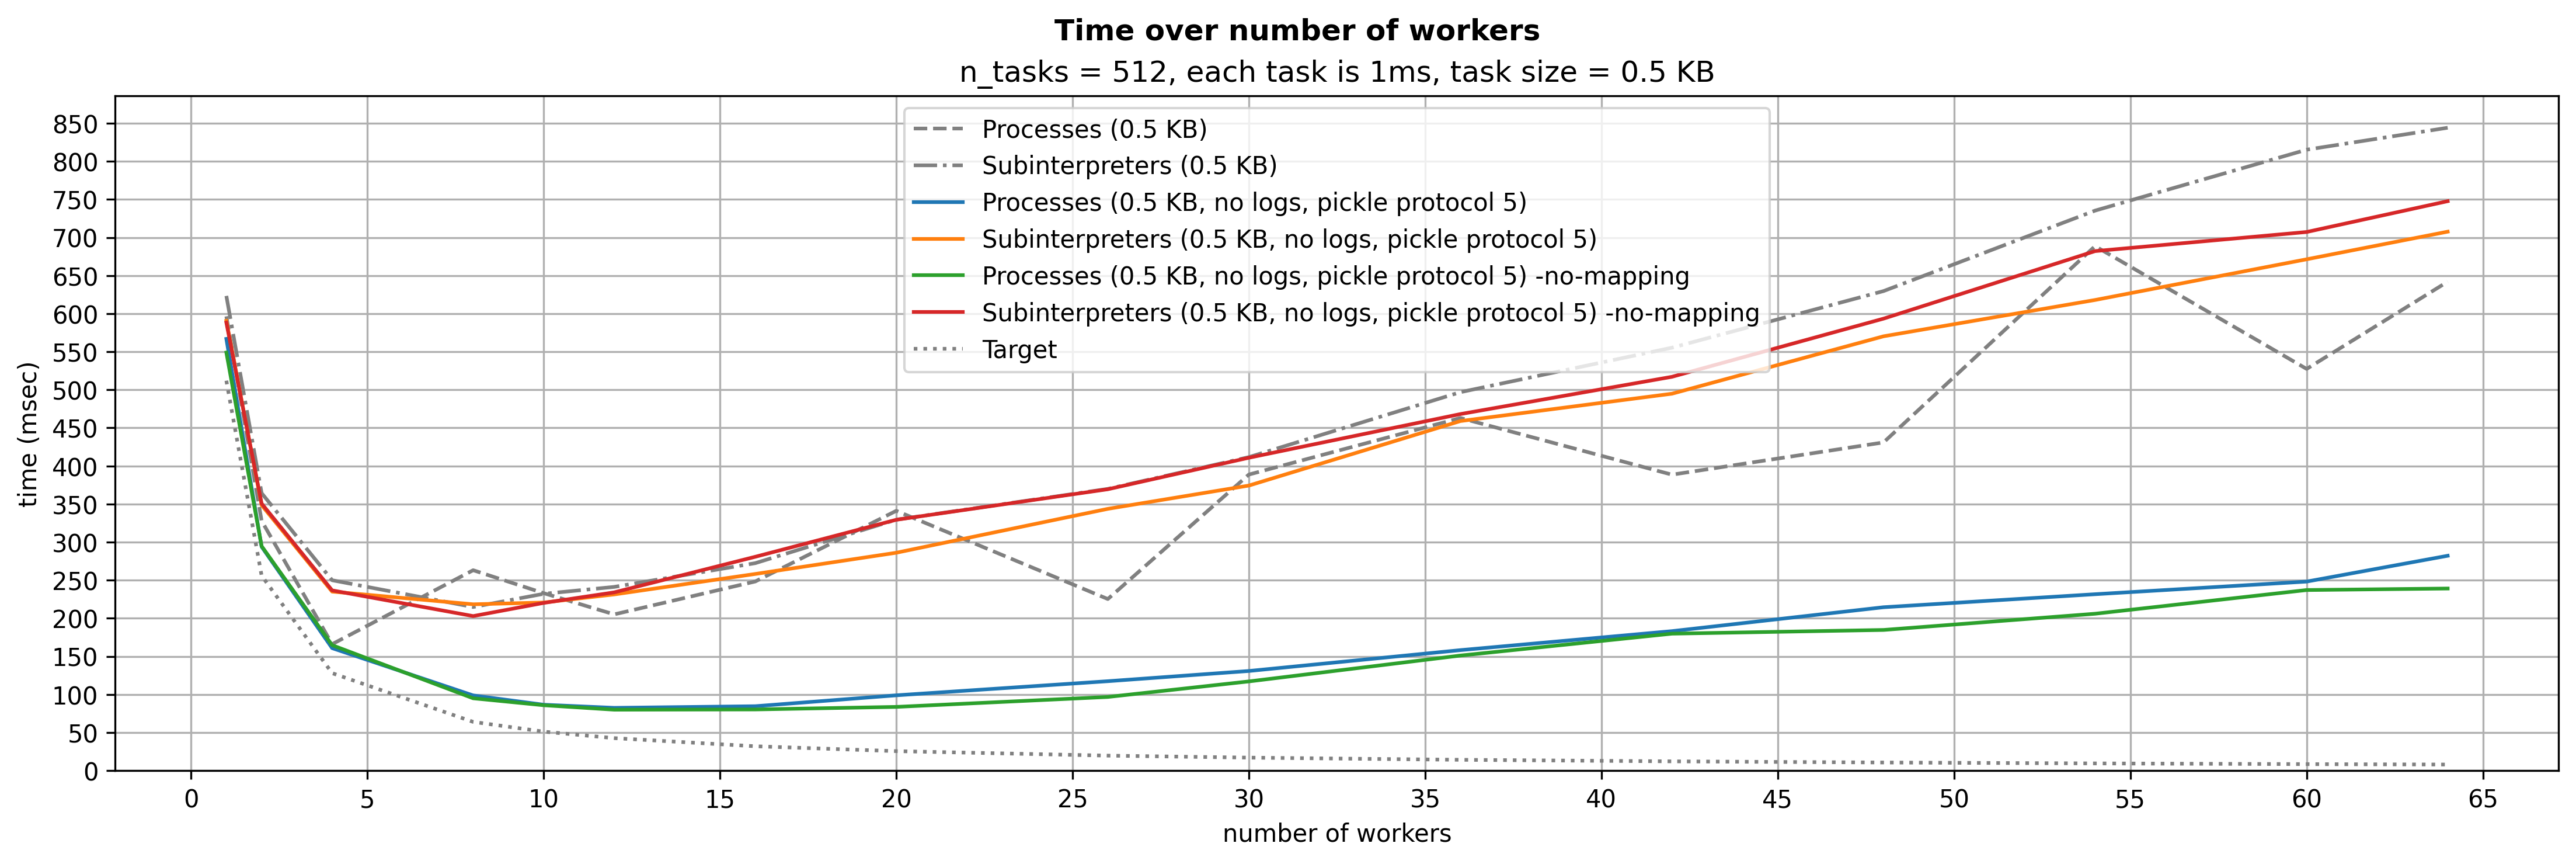

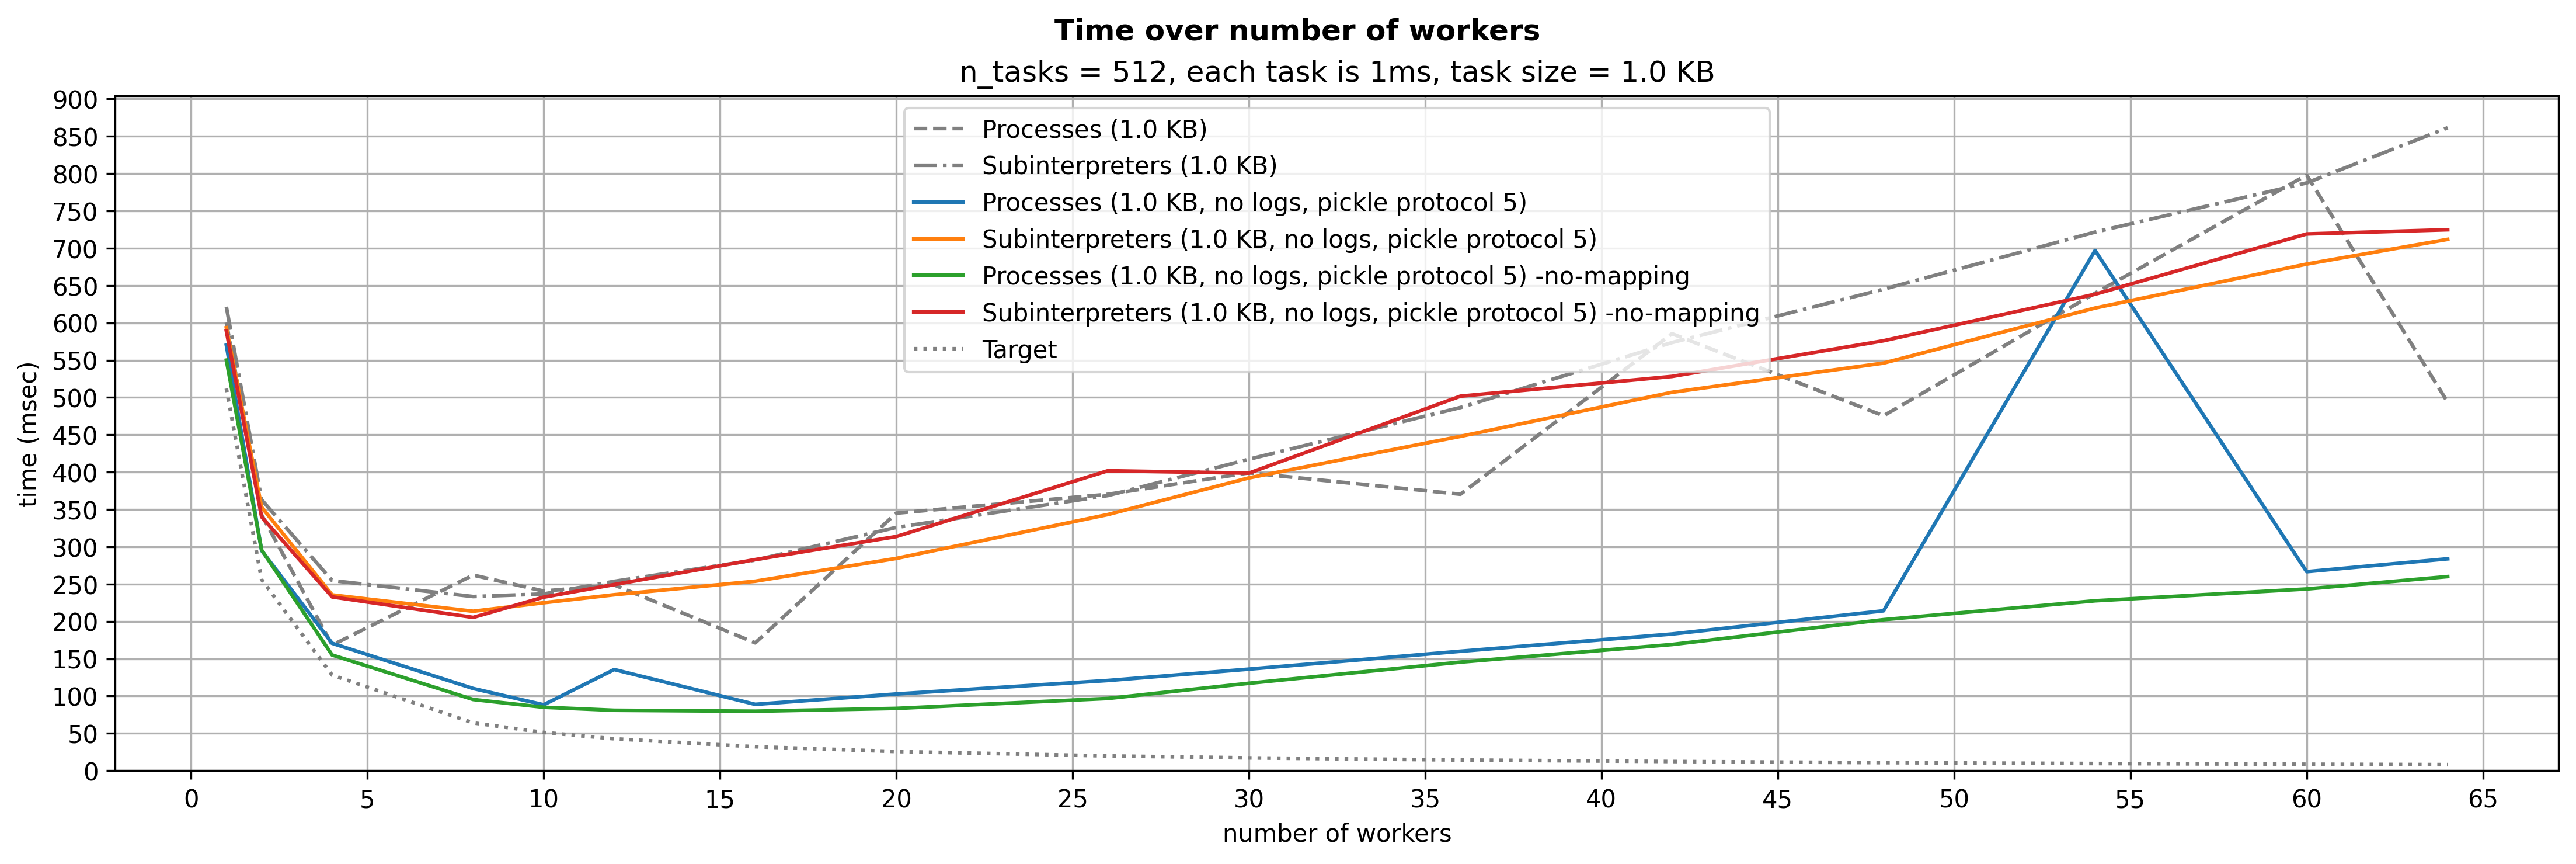

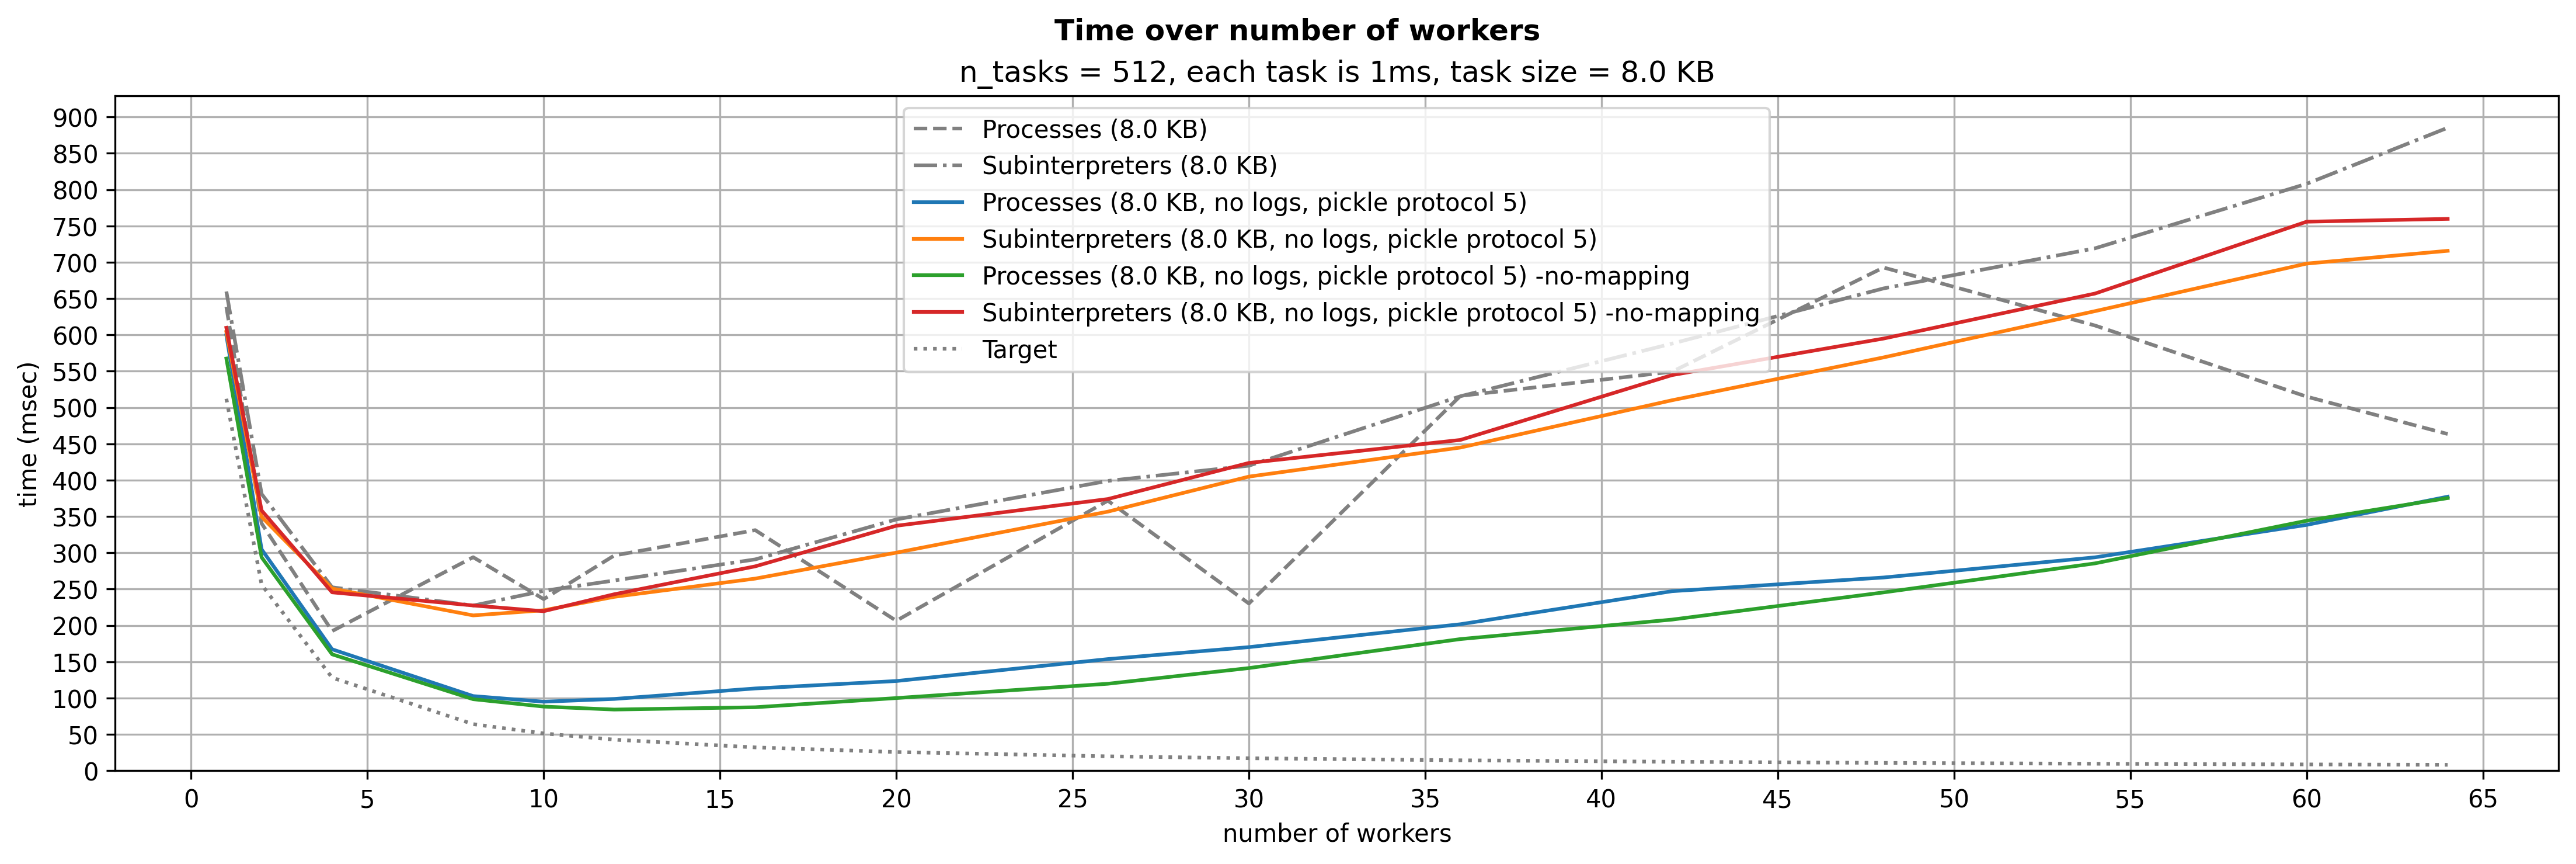

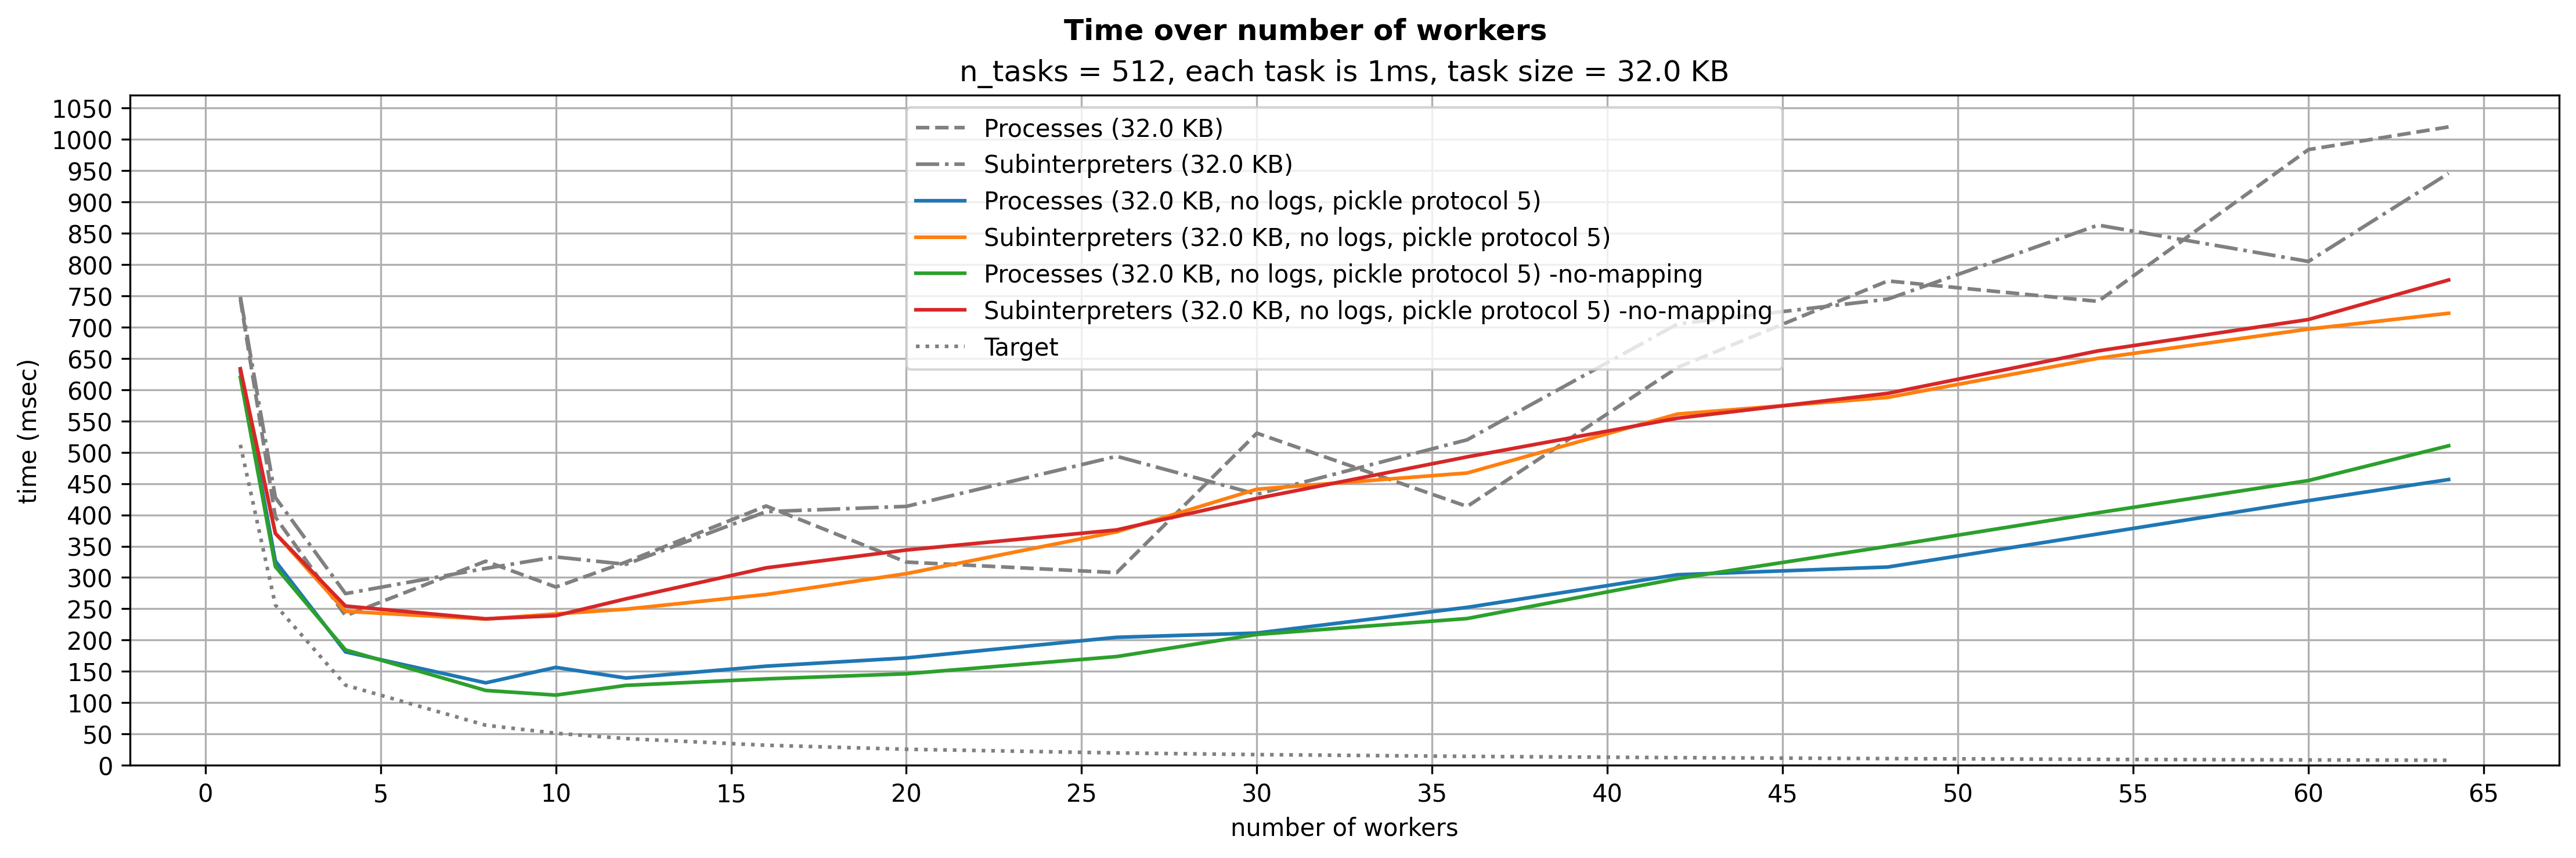

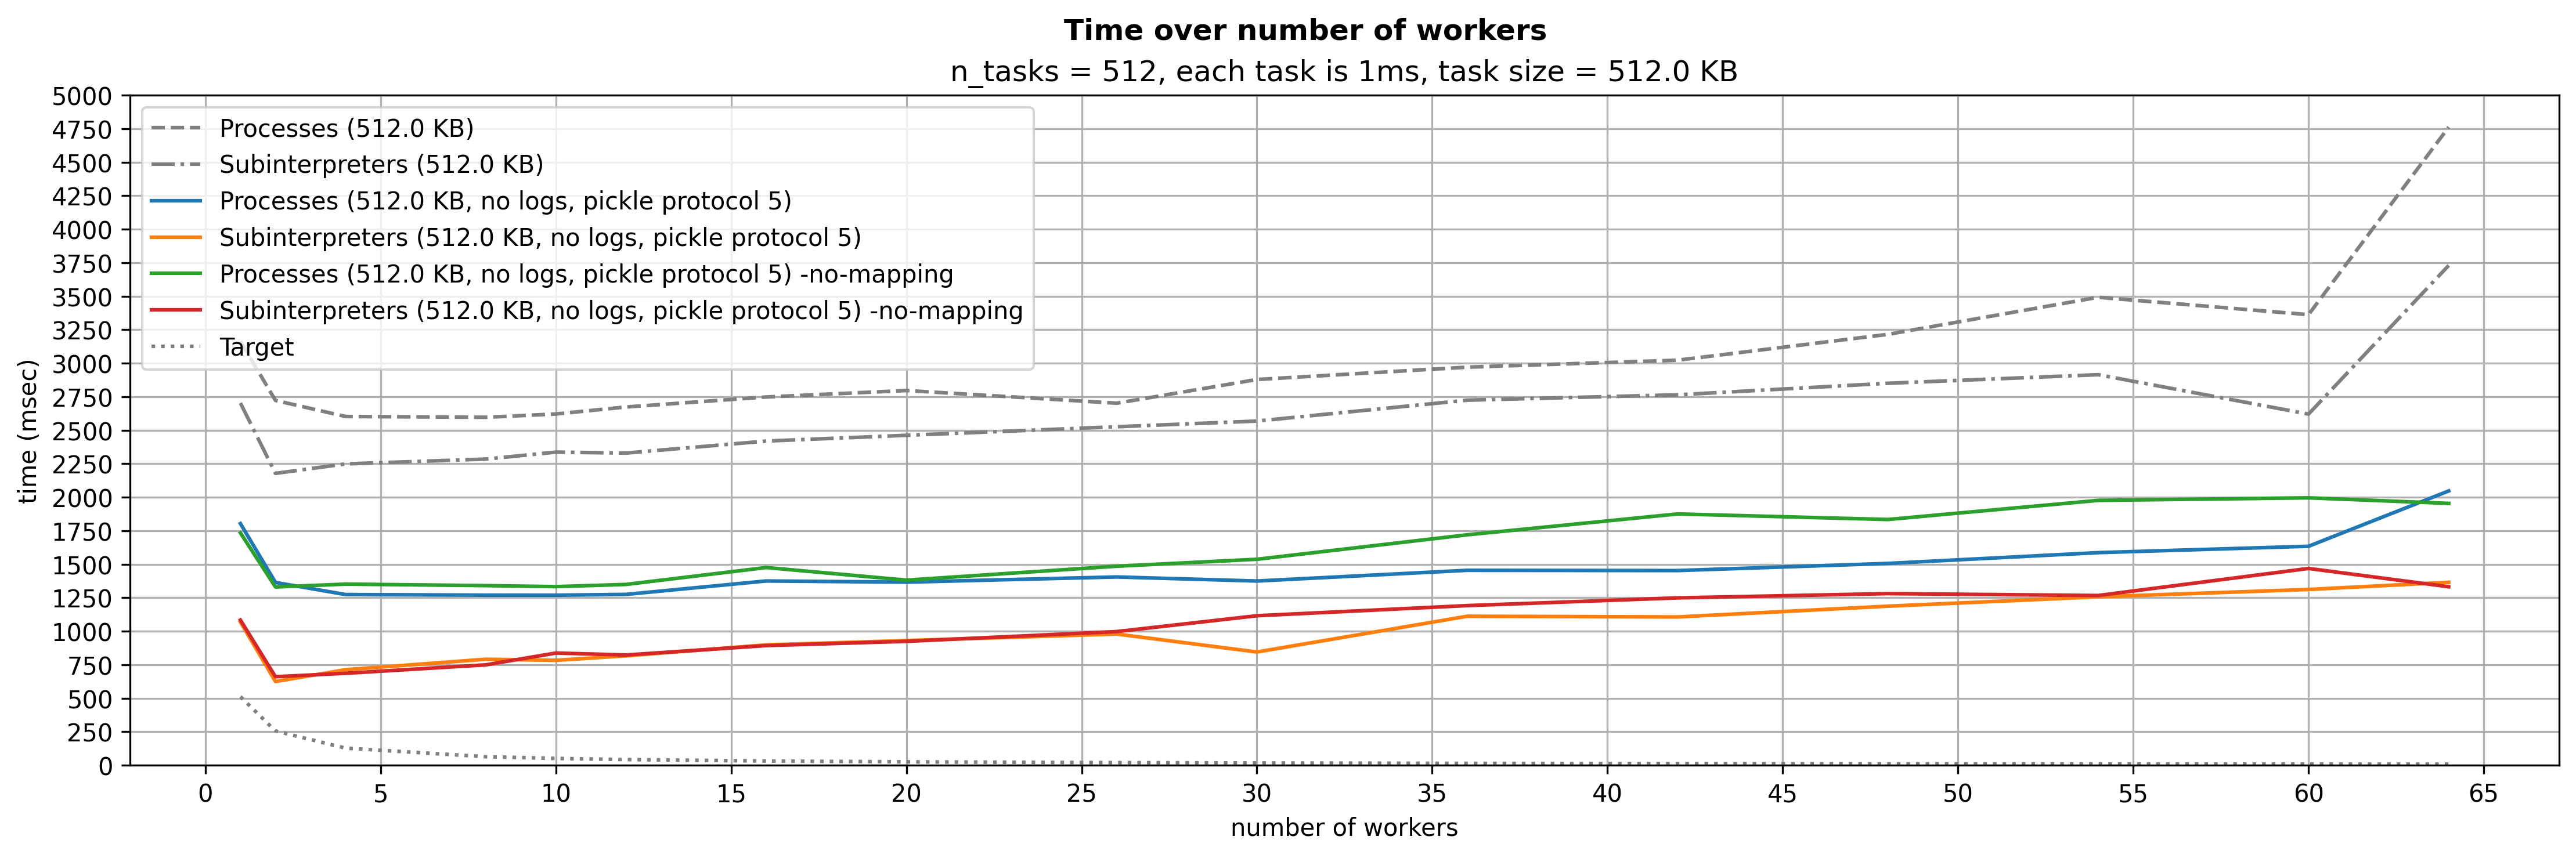

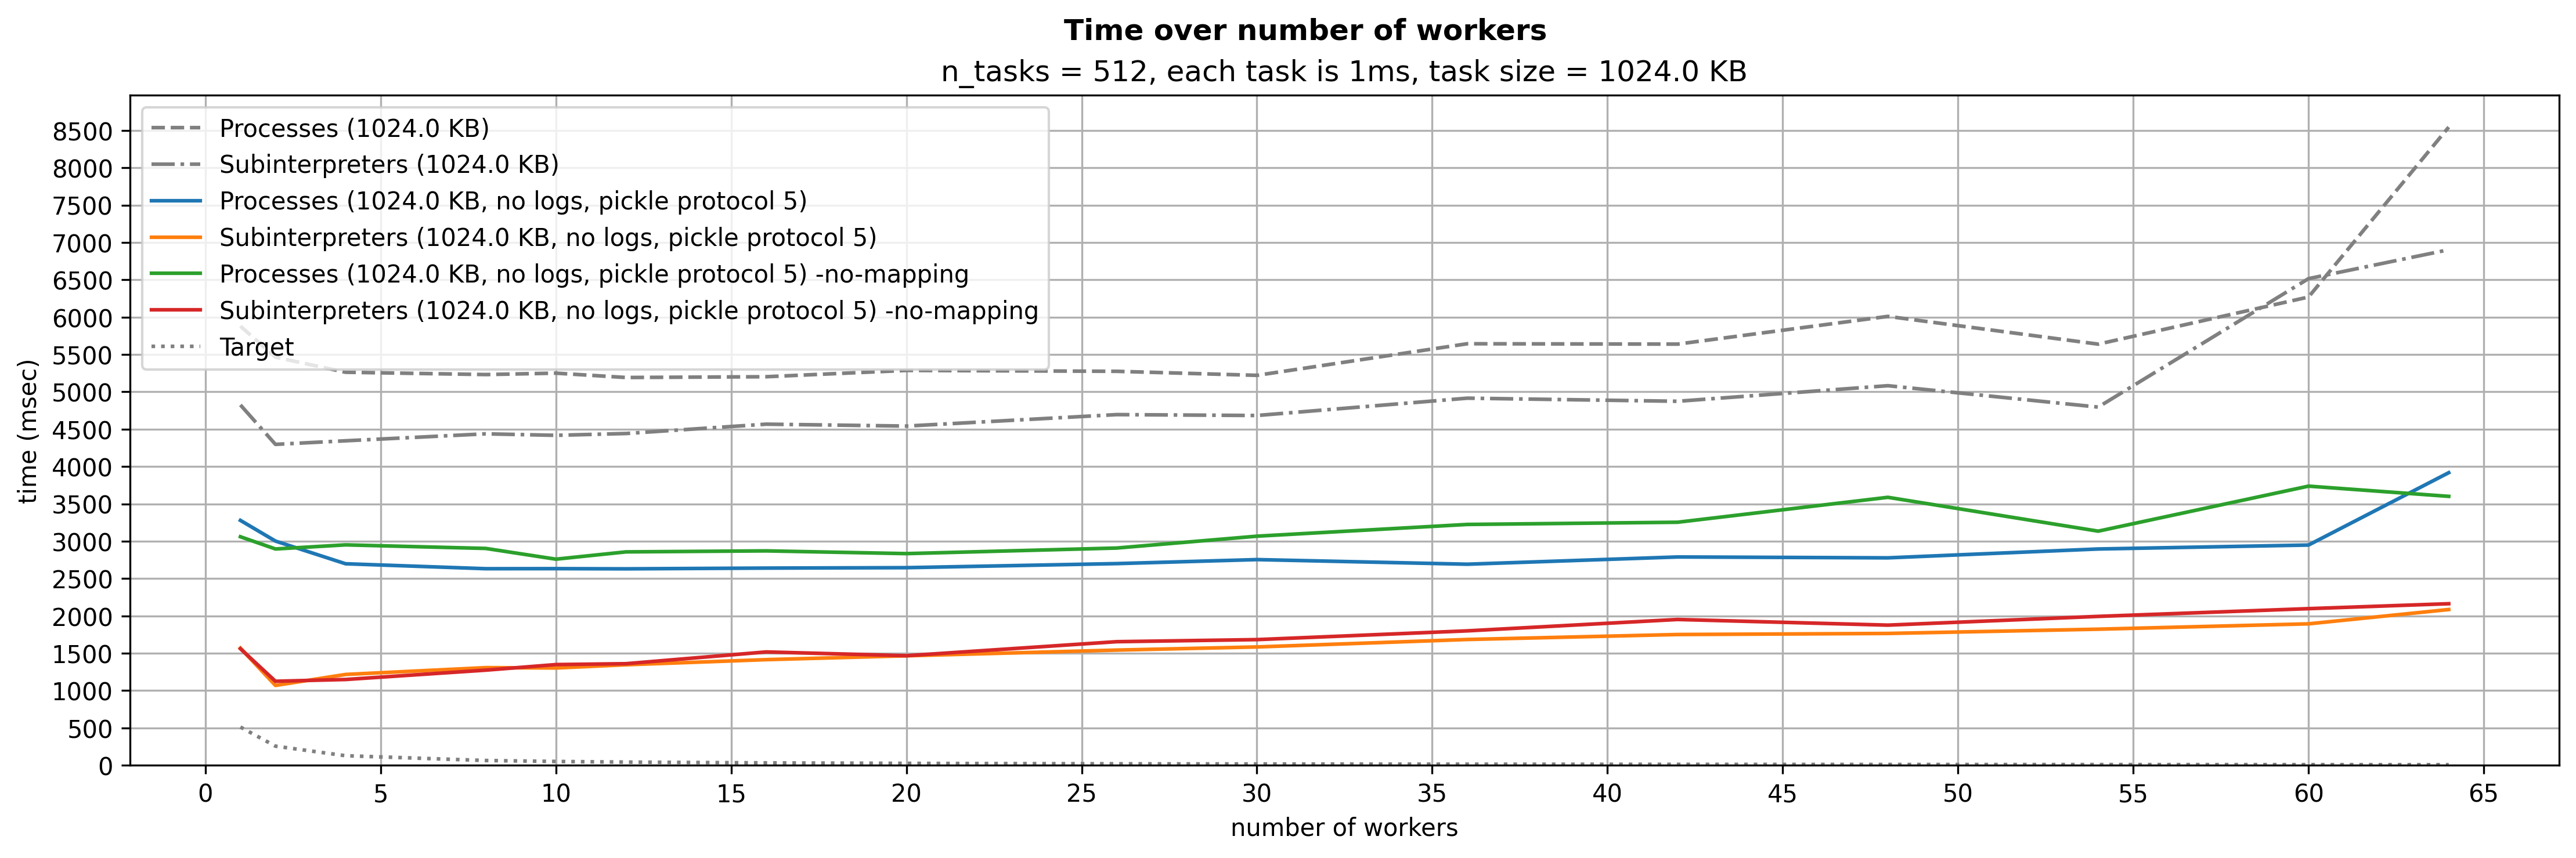

In [49]:
for i in range(len(subinterpreters)):
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    axs.grid()
    # Setting the number of ticks
    plt.locator_params(axis='x', nbins=len(x_axis_workers)) 
    plt.locator_params(axis='y', nbins=24)
    kb_proc = 0.1 if processes[i][0] == 100 else processes[i][0] / 1024
    kb_sub = 0.1 if subinterpreters[i][0] == 100 else subinterpreters[i][0] / 1024
    plt.plot(x_axis_workers, processes[i][1], label=f"Processes ({kb_proc} KB)", color="grey", ls="--")
    plt.plot(x_axis_workers, subinterpreters[i][1], label=f"Subinterpreters ({kb_sub} KB)", color="grey", ls="-.")
    plt.plot(x_axis_workers, processes_proto5[i][1], label=f"Processes ({kb_proc} KB, no logs, pickle protocol 5)")
    plt.plot(x_axis_workers, subinterpreters_proto5[i][1], label=f"Subinterpreters ({kb_sub} KB, no logs, pickle protocol 5)")
    plt.plot(x_axis_workers, processes_proto5_no_mapping[i][1], label=f"Processes ({kb_proc} KB, no logs, pickle protocol 5) -no-mapping")
    plt.plot(x_axis_workers, subinterpreters_proto5_no_mapping[i][1], label=f"Subinterpreters ({kb_sub} KB, no logs, pickle protocol 5) -no-mapping")
    plt.plot(x_axis_workers, target, ls="dotted", label="Target", color="grey")

    axs.set_xlabel("number of workers")
    axs.set_ylabel("time (msec)")
    axs.set_ylim(ymin=0)#, ymax=8500)

    plt.suptitle('Time over number of workers', y=0.97, fontweight="bold")
    plt.title(f"{subtitle}, task size = {kb_proc} KB")
    plt.legend()
    #savefig("stream_service_time")
    plt.show()

In [50]:
res = dict()
res[100] = res.get(100, []); res.get(100).append((1, 588.388)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((1, 588.29)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((1, 589.064)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((1, 609.743)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((1, 633.502)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((1, 1083.892)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((1, 1560.621)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((2, 340.293)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((2, 350.713)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((2, 340.062)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((2, 358.202)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((2, 370.376)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((2, 660.946)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((2, 1124.991)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((4, 241.556)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((4, 236.678)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((4, 232.811)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((4, 245.483)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((4, 254.383)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((4, 686.473)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((4, 1148.581)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((8, 225.478)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((8, 202.922)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((8, 205.261)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((8, 227.413)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((8, 233.993)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((8, 749.312)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((8, 1273.819)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((10, 227.234)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((10, 220.214)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((10, 232.448)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((10, 219.508)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((10, 238.981)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((10, 837.619)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((10, 1348.31)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((12, 237.051)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((12, 234.066)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((12, 249.314)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((12, 242.858)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((12, 265.905)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((12, 823.068)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((12, 1360.228)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((16, 279.471)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((16, 280.781)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((16, 282.775)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((16, 281.277)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((16, 315.44)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((16, 893.108)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((16, 1517.701)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((20, 327.686)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((20, 329.379)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((20, 313.647)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((20, 337.148)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((20, 343.862)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((20, 924.863)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((20, 1466.978)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((26, 363.726)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((26, 369.47)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((26, 401.826)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((26, 373.938)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((26, 376.007)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((26, 997.754)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((26, 1654.9299999999998)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((30, 444.413)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((30, 410.829)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((30, 398.638)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((30, 423.648)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((30, 426.35)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((30, 1115.937)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((30, 1682.7)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((36, 472.608)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((36, 468.179)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((36, 501.718)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((36, 455.329)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((36, 492.688)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((36, 1191.606)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((36, 1799.826)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((42, 526.963)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((42, 517.115)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((42, 528.199)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((42, 544.603)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((42, 554.468)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((42, 1249.193)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((42, 1952.286)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((48, 558.373)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((48, 593.469)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((48, 575.988)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((48, 594.911)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((48, 594.145)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((48, 1281.159)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((48, 1876.467)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((54, 633.519)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((54, 682.14)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((54, 638.348)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((54, 656.922)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((54, 662.052)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((54, 1266.939)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((54, 1993.6190000000001)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((60, 691.179)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((60, 707.242)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((60, 719.118)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((60, 755.819)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((60, 712.144)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((60, 1468.834)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((60, 2097.274)) # bytes = 1048576 ms = 1
res[100] = res.get(100, []); res.get(100).append((64, 733.943)) # bytes = 100 ms = 1
res[512] = res.get(512, []); res.get(512).append((64, 747.702)) # bytes = 512 ms = 1
res[1024] = res.get(1024, []); res.get(1024).append((64, 724.785)) # bytes = 1024 ms = 1
res[8192] = res.get(8192, []); res.get(8192).append((64, 759.695)) # bytes = 8192 ms = 1
res[32768] = res.get(32768, []); res.get(32768).append((64, 775.304)) # bytes = 32768 ms = 1
res[524288] = res.get(524288, []); res.get(524288).append((64, 1332.234)) # bytes = 524288 ms = 1
res[1048576] = res.get(1048576, []); res.get(1048576).append((64, 2163.223)) # bytes = 1048576 ms = 1

final_result = []
for bytes, lis in res.items():
    row = [bytes, []]
    final_result.append(row)
    for (nw, time_ms) in lis:
        row[1].append(time_ms)
    print(row, end=",\n")

[100, [588.388, 340.293, 241.556, 225.478, 227.234, 237.051, 279.471, 327.686, 363.726, 444.413, 472.608, 526.963, 558.373, 633.519, 691.179, 733.943]],
[512, [588.29, 350.713, 236.678, 202.922, 220.214, 234.066, 280.781, 329.379, 369.47, 410.829, 468.179, 517.115, 593.469, 682.14, 707.242, 747.702]],
[1024, [589.064, 340.062, 232.811, 205.261, 232.448, 249.314, 282.775, 313.647, 401.826, 398.638, 501.718, 528.199, 575.988, 638.348, 719.118, 724.785]],
[8192, [609.743, 358.202, 245.483, 227.413, 219.508, 242.858, 281.277, 337.148, 373.938, 423.648, 455.329, 544.603, 594.911, 656.922, 755.819, 759.695]],
[32768, [633.502, 370.376, 254.383, 233.993, 238.981, 265.905, 315.44, 343.862, 376.007, 426.35, 492.688, 554.468, 594.145, 662.052, 712.144, 775.304]],
[524288, [1083.892, 660.946, 686.473, 749.312, 837.619, 823.068, 893.108, 924.863, 997.754, 1115.937, 1191.606, 1249.193, 1281.159, 1266.939, 1468.834, 1332.234]],
[1048576, [1560.621, 1124.991, 1148.581, 1273.819, 1348.31, 1360.228, 15